In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as plt
import seaborn as sns

In [34]:
data = pd.read_csv("ecologyStamps/data/stamps.csv",sep = ';')
print(data.head())

           X          Y     id        lat       long                 type  \
0  -0.580500  44.840439   7326  -0.580500  44.840439          Oberaden 74   
1   2.174100  41.398371  33256   2.174100  41.398371  Dressel 2-4 Catalan   
2   4.032143  46.926780  20958   4.032143  46.926780            Dressel 1   
3  -3.983333  55.950000  16637  -3.983333  55.950000           Dressel 20   
4  11.883333  45.416667  33025  11.883333  45.416667           Dressel 6B   

           site        code           name  
0      Bordeaux  PHILODAMVS      Aquitania  
1     Barcelona           O  Tarraconensis  
2  Mont-Beuvray         SIN    Lugdunensis  
3   Cumbernauld          PQ      Caledonia  
4        Padova        LAEK         Italia  


In [35]:

try:
    data = pd.read_csv("ecologyStamps/data/stamps.csv", sep=';')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: stamps.csv not found. Check the path.")
    # Handle error appropriately
except Exception as e:
    print(f"An error occurred during loading: {e}")
    # Handle error appropriately

# Basic Inspection (if data loaded)
if 'data' in locals():
    print("\n--- Data Info ---")
    data.info() # Check data types, non-null counts

    print("\n--- First 5 Rows ---")
    print(data.head())

    print("\n--- Numerical Summary ---")
    print(data.describe()) # Summary stats for numerical cols

    print("\n--- Categorical Summary ---")
    print(data.describe(include='object')) # Summary for text cols

Data loaded successfully.

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       24092 non-null  float64
 1   Y       24092 non-null  float64
 2   id      24092 non-null  int64  
 3   lat     24092 non-null  float64
 4   long    24092 non-null  float64
 5   type    24092 non-null  object 
 6   site    24092 non-null  object 
 7   code    24085 non-null  object 
 8   name    24092 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB

--- First 5 Rows ---
           X          Y     id        lat       long                 type  \
0  -0.580500  44.840439   7326  -0.580500  44.840439          Oberaden 74   
1   2.174100  41.398371  33256   2.174100  41.398371  Dressel 2-4 Catalan   
2   4.032143  46.926780  20958   4.032143  46.926780            Dressel 1   
3  -3.983333  55.950000  16637  -3.983333  55.95

In [36]:
# Assuming 'data' is your DataFrame loaded with sep=';'
# data = pd.read_csv("ecologyStamps/data/stamps.csv", sep=';')

# Make sure the columns are numeric (they should be, but good to check)
# data['X'] = pd.to_numeric(data['X'], errors='coerce')
# data['Y'] = pd.to_numeric(data['Y'], errors='coerce')
# data['long'] = pd.to_numeric(data['long'], errors='coerce')
# data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
# data = data.dropna(subset=['X', 'Y', 'lat', 'long']) # Drop rows where any coordinate is missing for correlation

# --- Method 1: Pairwise Correlation ---
corr_x_long = data['X'].corr(data['long'])
corr_y_lat = data['Y'].corr(data['lat'])

print(f"Correlation between X and long: {corr_x_long:.6f}")
print(f"Correlation between Y and lat: {corr_y_lat:.6f}")

# --- Method 2: Correlation Matrix (More Comprehensive) ---
# Select only the coordinate columns
coord_cols = ['X', 'Y', 'lat', 'long']
correlation_matrix = data[coord_cols].corr()

print("\n--- Correlation Matrix ---")
print(correlation_matrix)

# --- Visualize the Correlation Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix of Coordinate Columns')
plt.show()

Correlation between X and long: -0.193347
Correlation between Y and lat: -0.193347

--- Correlation Matrix ---
             X         Y       lat      long
X     1.000000 -0.193347  1.000000 -0.193347
Y    -0.193347  1.000000 -0.193347  1.000000
lat   1.000000 -0.193347  1.000000 -0.193347
long -0.193347  1.000000 -0.193347  1.000000


TypeError: 'module' object is not callable

In [37]:
    # Drop redundant columns (as discussed)
if 'X' in data.columns and 'Y' in data.columns:
    df = data.drop(columns=['X', 'Y'])
    print("Dropped 'X' and 'Y' columns.")

    # Basic check
    print("\n--- Data Info ---")
    df.info()
    print("\n--- First 5 Rows ---")
    print(df.head())

Dropped 'X' and 'Y' columns.

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      24092 non-null  int64  
 1   lat     24092 non-null  float64
 2   long    24092 non-null  float64
 3   type    24092 non-null  object 
 4   site    24092 non-null  object 
 5   code    24085 non-null  object 
 6   name    24092 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB

--- First 5 Rows ---
      id        lat       long                 type          site        code  \
0   7326  -0.580500  44.840439          Oberaden 74      Bordeaux  PHILODAMVS   
1  33256   2.174100  41.398371  Dressel 2-4 Catalan     Barcelona           O   
2  20958   4.032143  46.926780            Dressel 1  Mont-Beuvray         SIN   
3  16637  -3.983333  55.950000           Dressel 20   Cumbernauld          PQ   
4  33025  11.883333  4

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your loaded and prepped DataFrame

# Make sure 'data' DataFrame exists and has the necessary columns
if 'data' in locals() and 'type' in data.columns and 'name' in data.columns:
    # Calculate the crosstabulation using the 'data' DataFrame
    type_vs_name_crosstab = pd.crosstab(data['type'], data['name'])

    print("\n--- Crosstab: Pottery Type vs. Region (name) ---")
    # Displaying the table - NOTE: This might be very large!
    print(type_vs_name_crosstab)

    # Check the dimensions (number of types x number of regions)
    print(f"\nCrosstab dimensions: {type_vs_name_crosstab.shape}")

else:
    # Update the error message to refer to 'data'
    print("DataFrame 'data' or required columns ('type', 'name') not available.")


--- Crosstab: Pottery Type vs. Region (name) ---
name                Achaia  Aegyptus  Africa Proconsularis  Aquitania  Arabia  \
type                                                                            
Africana                 0         0                    21          2       0   
Africana 1 Piccolo       0         0                    10          0       0   
Africana 1A pic.         0         0                     1          0       0   
Africana 1B pic.         0         0                     2          0       0   
Africana 2               1         0                     9          0       0   
...                    ...       ...                   ...        ...     ...   
Tripolitanian 1          0         0                     0          0       0   
Tripolitanian 2          0         0                     0          0       0   
Tripolitanian 3          0         0                     1          0       0   
Tubulus                  0         0                     0 

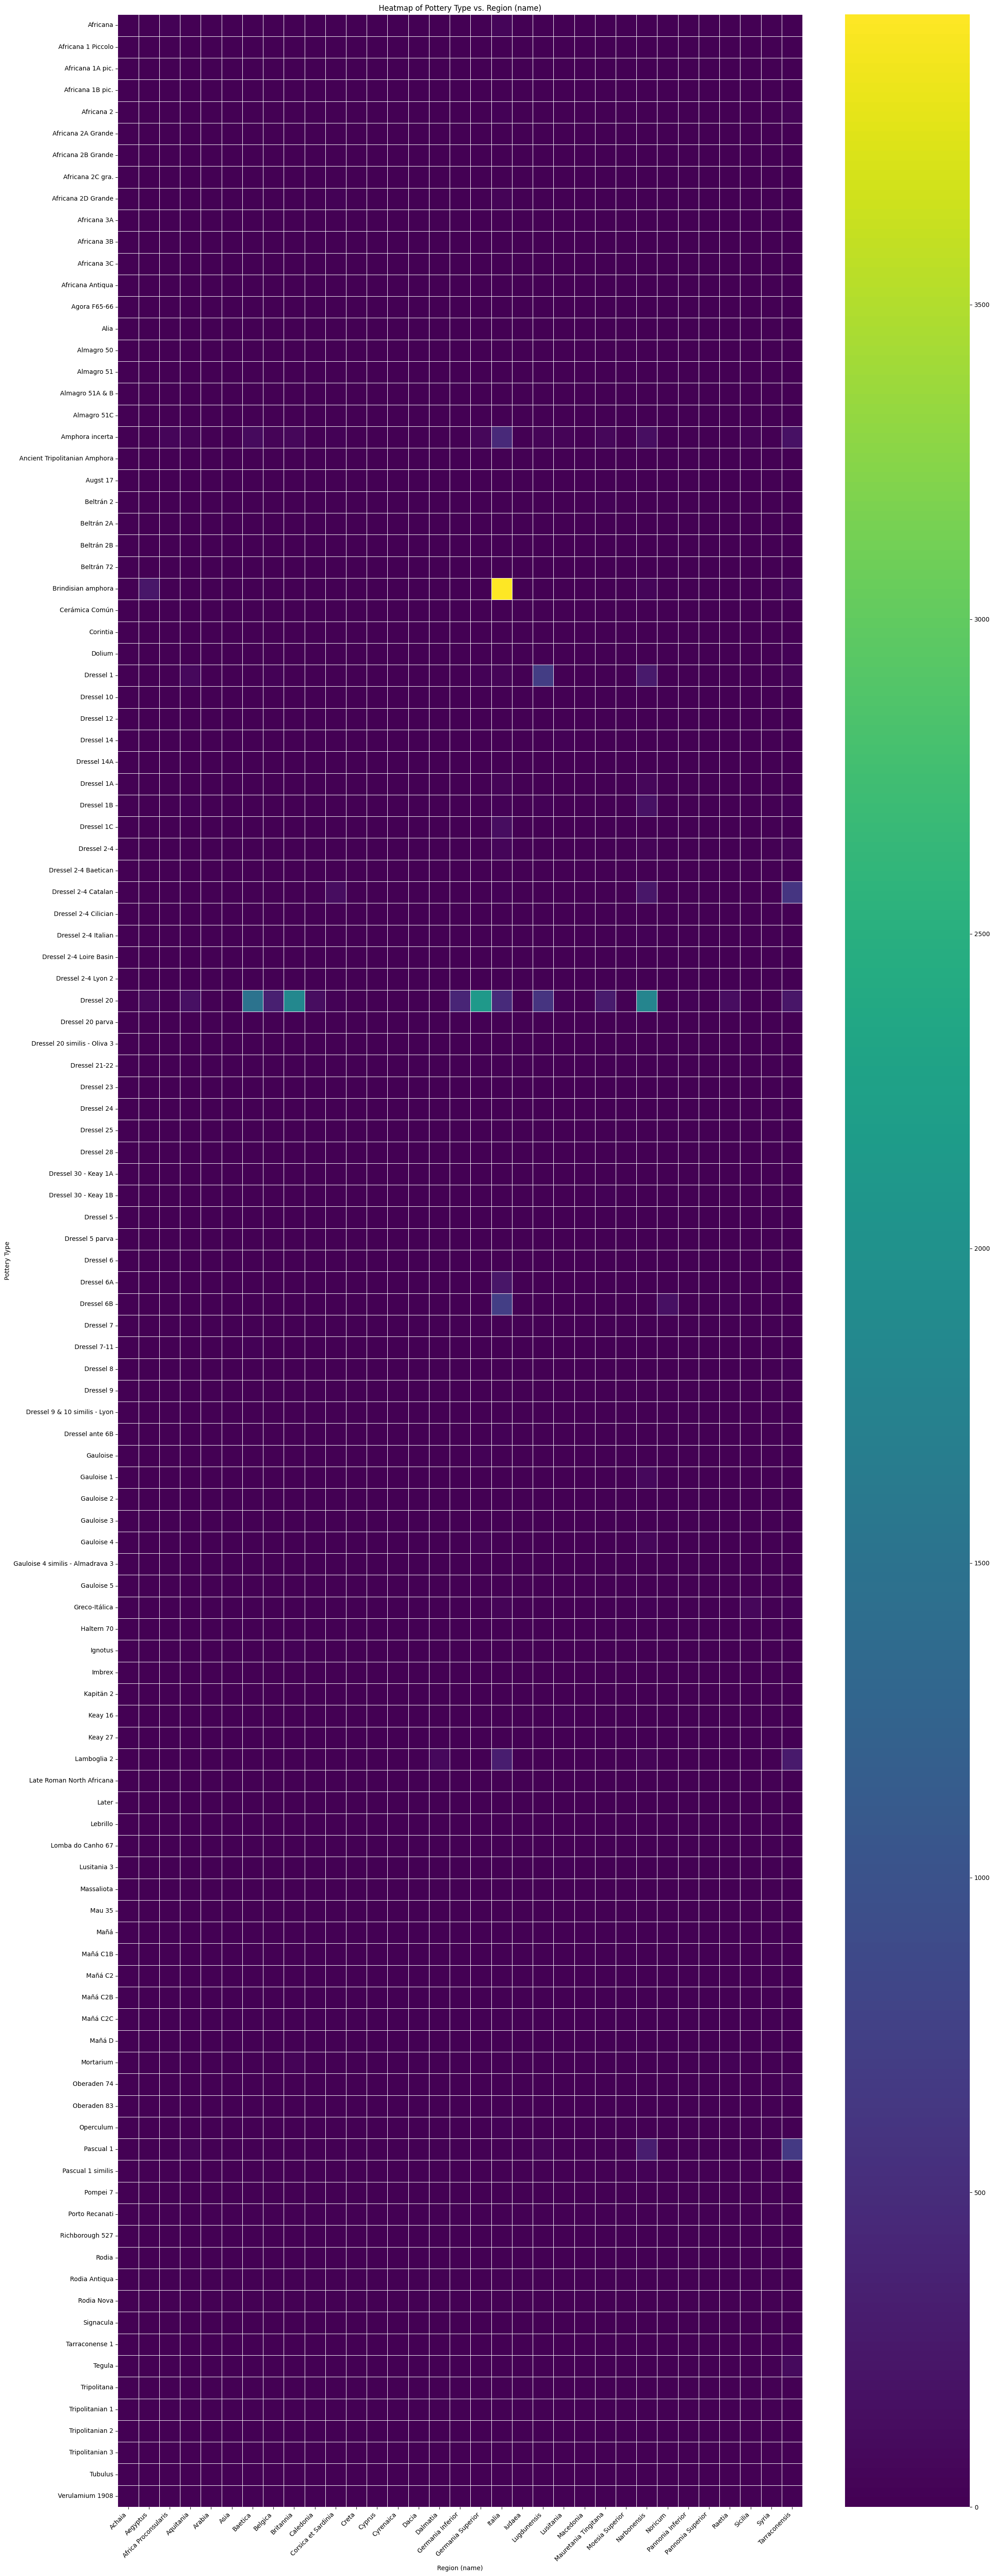

In [39]:
# Assuming type_vs_name_crosstab was just created successfully

if 'type_vs_name_crosstab' in locals():
    # Determine figure size based on table dimensions
    fig_width = max(10, type_vs_name_crosstab.shape[1] / 1.5)
    fig_height = max(8, type_vs_name_crosstab.shape[0] / 2)

    plt.figure(figsize=(fig_width, fig_height))
    # Key part: Use the crosstab data here! annot=False is good for large maps.
    sns.heatmap(type_vs_name_crosstab, annot=False, cmap="viridis", linewidths=.5)
    plt.title('Heatmap of Pottery Type vs. Region (name)')
    plt.xlabel('Region (name)')
    plt.ylabel('Pottery Type')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0) # May need adjustment if labels overlap
    plt.tight_layout()
    plt.show()
else:
    print("Crosstabulation 'type_vs_name_crosstab' not available for plotting.")


Top 5 Types:
 ['Dressel 20', 'Brindisian amphora', 'Amphora incerta', 'Dressel 1', 'Pascual 1']

Top 5 Regions:
 ['Italia', 'Narbonensis', 'Tarraconensis', 'Germania Superior', 'Britannia']

--- Filtered Crosstab (5 types x 5 regions) ---
name                Britannia  Germania Superior  Italia  Narbonensis  \
type                                                                    
Amphora incerta            68                 76     464          140   
Brindisian amphora          0                  1    3961           54   
Dressel 1                   1                 21      45          270   
Dressel 20               1845               2121     476         1807   
Pascual 1                   0                  2       2          318   

name                Tarraconensis  
type                               
Amphora incerta               182  
Brindisian amphora             57  
Dressel 1                      35  
Dressel 20                    230  
Pascual 1                     65

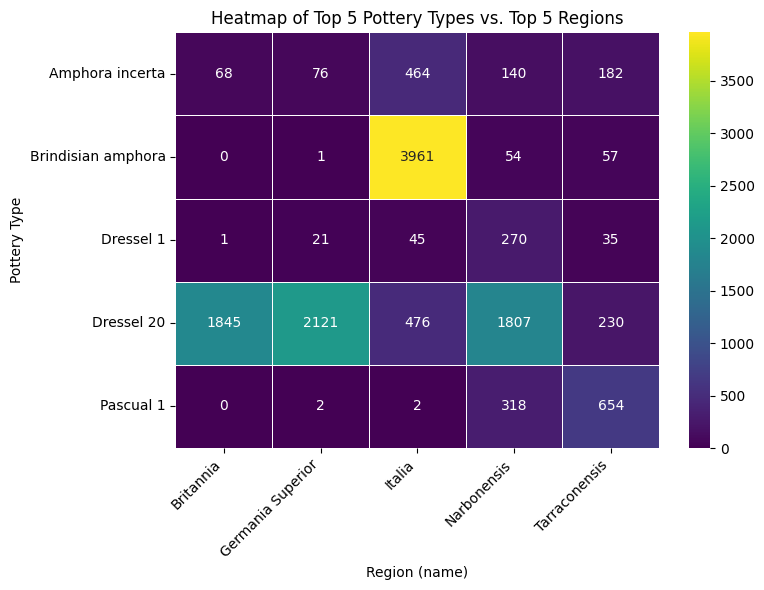

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your loaded DataFrame
# Assuming 'type_vs_name_crosstab' is your full (115x33) crosstab calculated earlier

# --- Check if necessary variables exist ---
if 'data' in locals() and 'type_vs_name_crosstab' in locals():

    # --- Define N and M (You can change these numbers) ---
    N = 5  # Number of top types to show
    M = 5  # Number of top regions to show
    # ----------------------------------------------------

    # 1. Find the Top N most frequent types in the whole dataset
    top_N_types = data['type'].value_counts().nlargest(N).index
    print(f"\nTop {N} Types:\n", top_N_types.tolist())

    # 2. Find the Top M most frequent regions in the whole dataset
    top_M_regions = data['name'].value_counts().nlargest(M).index
    print(f"\nTop {M} Regions:\n", top_M_regions.tolist())

    # 3. Filter the *original full crosstab* to keep only these top types and regions
    # We use .loc[] for label-based indexing.
    # It's good practice to ensure the selected types/regions actually exist in the crosstab's index/columns
    types_to_keep = type_vs_name_crosstab.index.intersection(top_N_types)
    regions_to_keep = type_vs_name_crosstab.columns.intersection(top_M_regions)

    filtered_crosstab = type_vs_name_crosstab.loc[types_to_keep, regions_to_keep]

    print(f"\n--- Filtered Crosstab ({len(types_to_keep)} types x {len(regions_to_keep)} regions) ---")
    print(filtered_crosstab)
    print(f"\nFiltered Crosstab dimensions: {filtered_crosstab.shape}")


    # 4. Generate the heatmap for the filtered crosstab
    # Adjust figsize if needed, it will be smaller now
    plt.figure(figsize=(max(8, len(regions_to_keep)), max(6, len(types_to_keep)))) # Dynamic figsize
    sns.heatmap(filtered_crosstab,
                annot=True,        # Show the counts in the cells (now feasible)
                fmt="d",           # Format annotations as integers
                cmap="viridis",
                linewidths=.5)
    plt.title(f'Heatmap of Top {len(types_to_keep)} Pottery Types vs. Top {len(regions_to_keep)} Regions')
    plt.xlabel('Region (name)')
    plt.ylabel('Pottery Type')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Required DataFrame 'data' or crosstab 'type_vs_name_crosstab' not found.")

In [41]:
import pandas as pd
import scipy.stats as stats

# Assuming 'filtered_crosstab' holds your 5x5 crosstab DataFrame
# from the previous filtering step.

# --- Check if the crosstab exists ---
if 'filtered_crosstab' in locals():

    print("\n--- Running Chi-Square Test of Independence ---")
    print("Hypotheses:")
    print(" H₀: Pottery Type and Region are independent.")
    print(" H₁: Pottery Type and Region are dependent (associated).")
    print("-" * 30)

    # Perform the Chi-Square test
    # The function takes the contingency table (crosstab) as input
    try:
        chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(filtered_crosstab)

        # Print the results
        print(f"Chi-Square Statistic (χ²): {chi2_stat:.4f}")
        print(f"Degrees of Freedom (df): {dof}")
        # Format p-value for readability, especially if very small
        if p_value < 0.0001:
            print(f"P-value: < 0.0001")
        else:
            print(f"P-value: {p_value:.4f}")

        # Print the expected frequencies table (optional, for checking assumptions)
        # print("\nExpected Frequencies Table:")
        # print(pd.DataFrame(expected_freq, index=filtered_crosstab.index, columns=filtered_crosstab.columns))

        print("-" * 30)
        # Interpret the result using alpha = 0.05 significance level
        alpha = 0.05
        print(f"Significance Level (α): {alpha}")

        if p_value < alpha:
            print("\nConclusion: Reject the null hypothesis (H₀).")
            print("There IS a statistically significant association between Pottery Type and Region.")
        else:
            print("\nConclusion: Fail to reject the null hypothesis (H₀).")
            print("There is NOT enough evidence to conclude a significant association between Pottery Type and Region.")

    except ValueError as e:
        # May occur if the table contains negative numbers or sums to zero
        print(f"Error running Chi-Square test: {e}")
        print("Please check the input crosstab.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

else:
    print("Variable 'filtered_crosstab' not found. Please create the filtered crosstab first.")


--- Running Chi-Square Test of Independence ---
Hypotheses:
 H₀: Pottery Type and Region are independent.
 H₁: Pottery Type and Region are dependent (associated).
------------------------------
Chi-Square Statistic (χ²): 14948.1671
Degrees of Freedom (df): 16
P-value: < 0.0001
------------------------------
Significance Level (α): 0.05

Conclusion: Reject the null hypothesis (H₀).
There IS a statistically significant association between Pottery Type and Region.



--- Part 1: Geographic Distribution of Top Types ---
There are 115 unique types in the dataset.

Plotting geographic distributions for the top 15 types: ['Dressel 20', 'Brindisian amphora', 'Amphora incerta', 'Dressel 1', 'Pascual 1', 'Dressel 2-4 Catalan', 'Dressel 6B', 'Lamboglia 2', 'Dressel 1B', 'Dressel 6A', 'Dressel 1A', 'Dressel 1C', 'Greco-Itálica', 'Dressel 2-4', 'Gauloise 4']


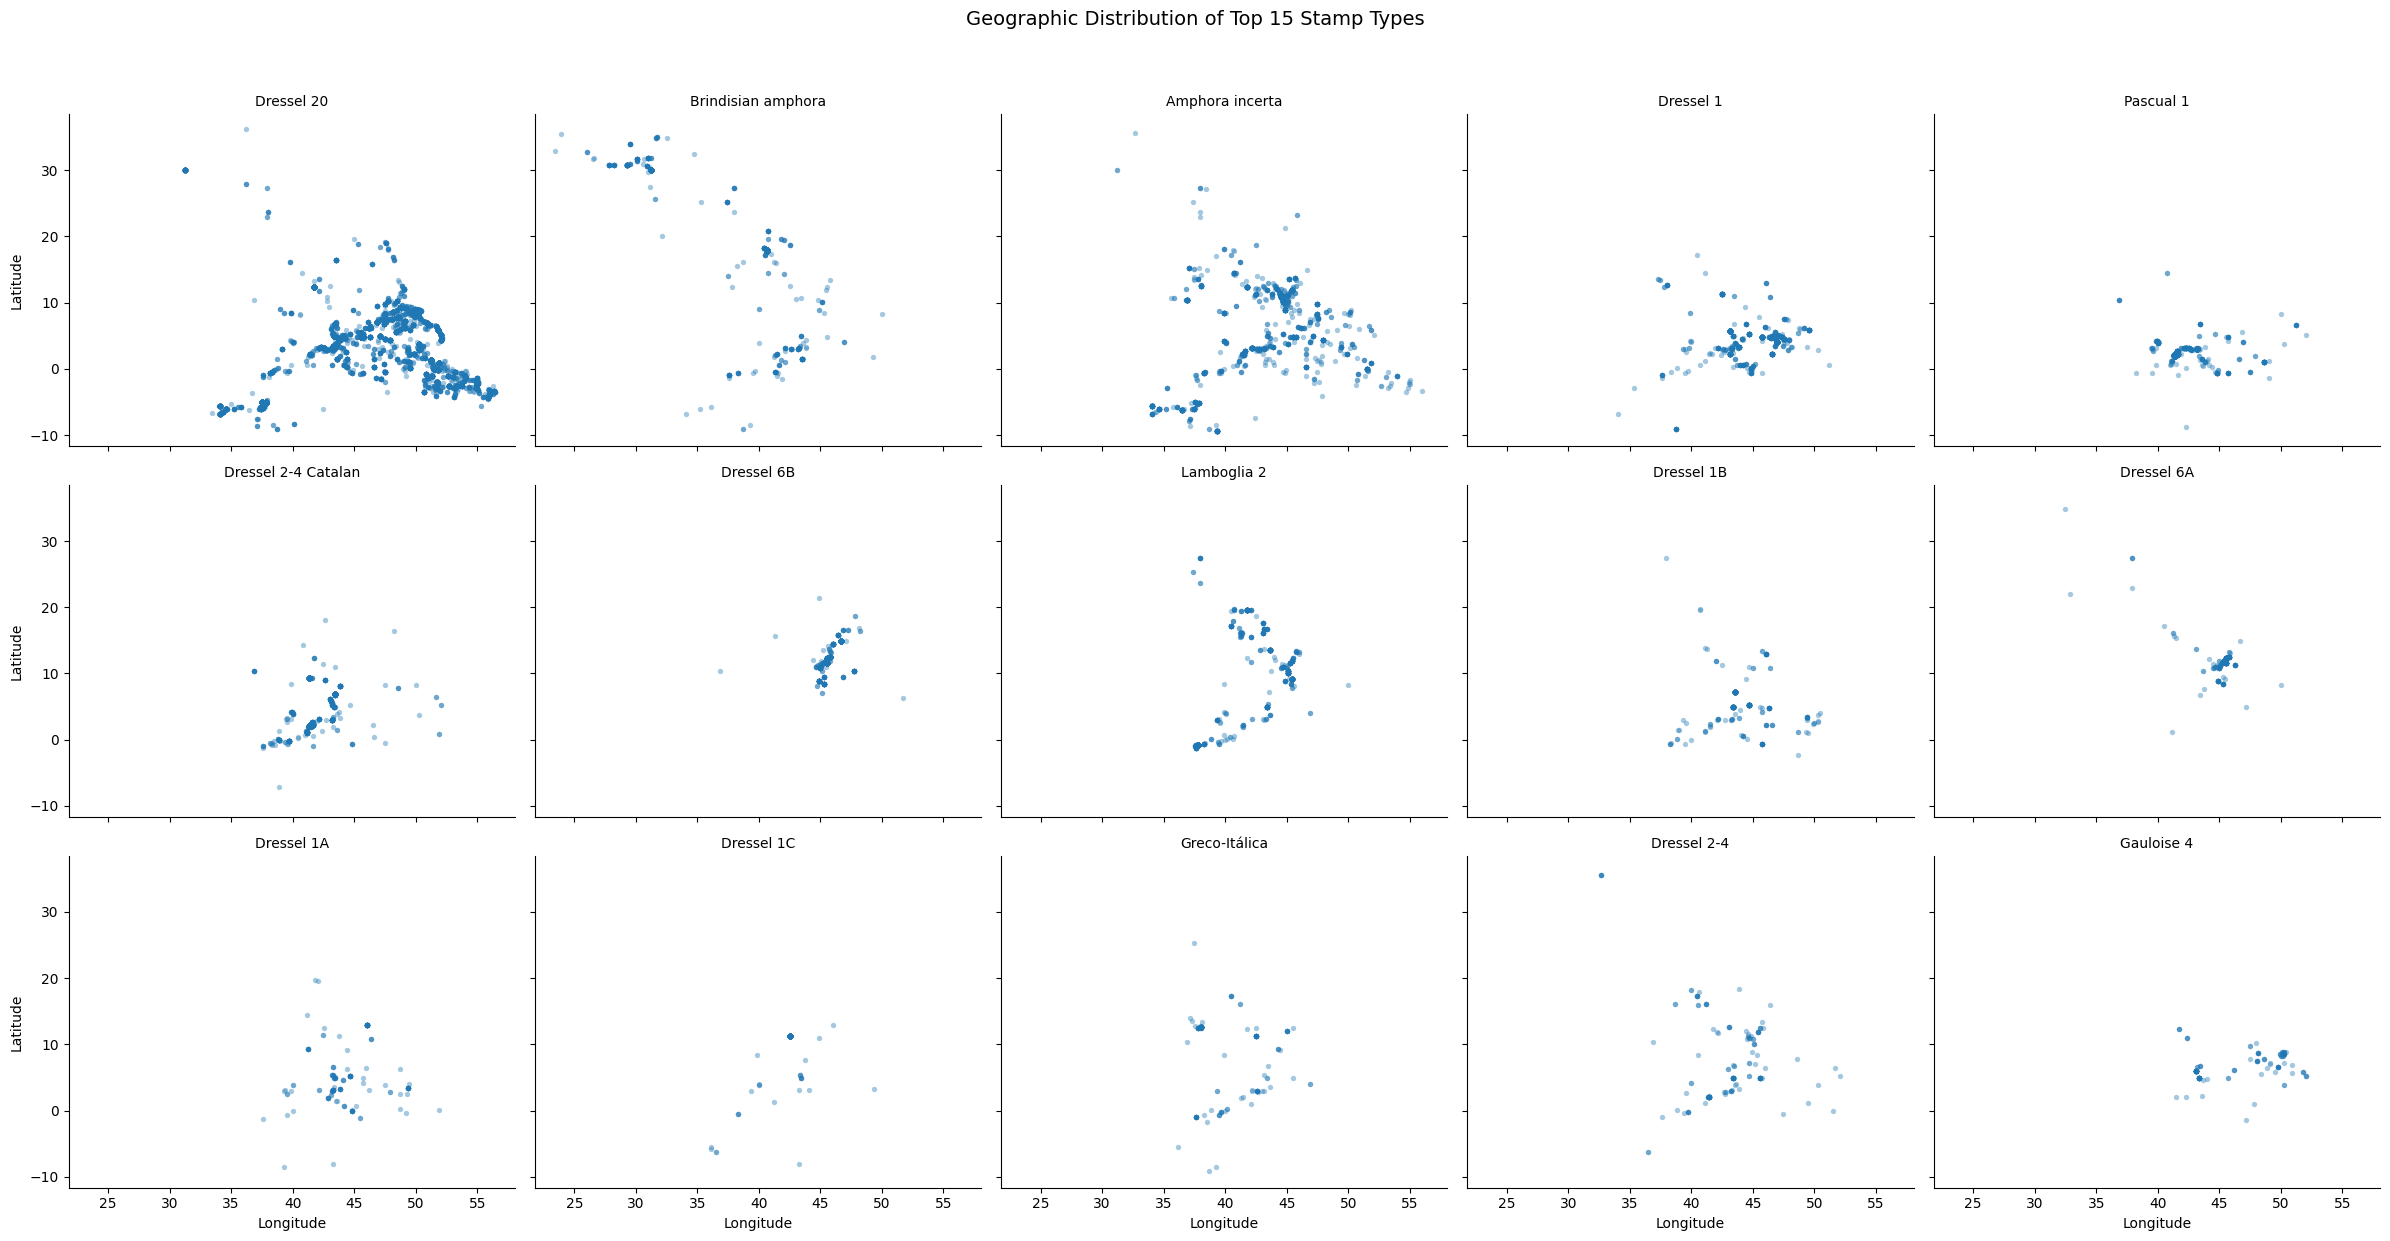


--- Part 2: Top 3 Types per Site ---
Calculating top 3 types per site...

Showing top 3 types for the 20 sites with the most finds overall:

Site: Brindisi
  - Type: Brindisian amphora, Count: 2054
  - Type: Lamboglia 2, Count: 3
  - Type: Amphora incerta, Count: 1

Site: Canale Giancola
  - Type: Brindisian amphora, Count: 1864
  - Type: Alia, Count: 1
  - Type: Amphora incerta, Count: 1

Site: Ostia Antica
  - Type: Dressel 20, Count: 443
  - Type: Amphora incerta, Count: 53
  - Type: Africana 2D Grande, Count: 42

Site: Mont-Beuvray
  - Type: Dressel 1, Count: 473
  - Type: Amphora incerta, Count: 5
  - Type: Pascual 1, Count: 4

Site: Golfe de Fos
  - Type: Dressel 20, Count: 308
  - Type: Dressel 1B, Count: 51
  - Type: Lamboglia 2, Count: 27

Site: Padova
  - Type: Dressel 6B, Count: 276
  - Type: Amphora incerta, Count: 71
  - Type: Dressel 6A, Count: 68

Site: Lyon?
  - Type: Dressel 20, Count: 298
  - Type: Dressel 1, Count: 82
  - Type: Amphora incerta, Count: 15

Site: Main

In [42]:
if 'data' in locals() and data is not None:
    print("\n--- Part 1: Geographic Distribution of Top Types ---")

    # a. Check number of unique types
    unique_type_count = data['type'].nunique()
    print(f"There are {unique_type_count} unique types in the dataset.")

    # b. Plot top N types (e.g., N=15)
    top_n_types_to_plot = 15
    if unique_type_count < top_n_types_to_plot:
        top_n_types_to_plot = unique_type_count # Adjust if fewer types than N
        print(f"Adjusted N to {top_n_types_to_plot} as there are fewer unique types.")

    if top_n_types_to_plot > 0:
        top_types = data['type'].value_counts().nlargest(top_n_types_to_plot).index.tolist()
        print(f"\nPlotting geographic distributions for the top {top_n_types_to_plot} types: {top_types}")

        data_top_types = data[data['type'].isin(top_types)].copy() # Use .copy() to avoid SettingWithCopyWarning

        # Create facet grid
        # Adjust col_wrap based on N for better layout (e.g., 5 columns)
        num_cols = 5
        g = sns.FacetGrid(data_top_types, col="type", col_wrap=num_cols,
                          height=4, aspect=1.2, sharex=True, sharey=True,
                          col_order=top_types) # Ensure order matches frequency

        # Plot scatter points on each facet
        g.map(sns.scatterplot, "long", "lat", alpha=0.4, s=15, linewidth=0)

        # Add titles and labels
        g.set_titles("{col_name}", size=10) # Set individual titles
        g.set_axis_labels("Longitude", "Latitude")

        # Add an overall title
        plt.suptitle(f'Geographic Distribution of Top {top_n_types_to_plot} Stamp Types', y=1.03, size=14)
        plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust layout
        plt.show()
    else:
        print("No types found to plot.")


    print("\n--- Part 2: Top 3 Types per Site ---")

    # c. Calculate top 3 types per site
    print("Calculating top 3 types per site...")
    try:
        # Group by site and type, count occurrences
        site_type_counts = data.groupby(['site', 'type'], observed=True).size().reset_index(name='count')

        # Sort within each site group and get top 3
        top_3_per_site = site_type_counts.sort_values(['site', 'count'], ascending=[True, False]) \
                                      .groupby('site') \
                                      .head(3) \
                                      .reset_index(drop=True)

        # Display for the top N overall sites (e.g., N=20)
        top_n_sites_to_show = 20
        top_sites_overall = data['site'].value_counts().nlargest(top_n_sites_to_show).index.tolist()

        print(f"\nShowing top 3 types for the {len(top_sites_overall)} sites with the most finds overall:")
        if not top_3_per_site.empty:
            for site in top_sites_overall:
                print(f"\nSite: {site}")
                # Filter the pre-calculated top 3 results for the current site
                site_data = top_3_per_site[top_3_per_site['site'] == site]
                if not site_data.empty:
                    for _, row in site_data.iterrows():
                        print(f"  - Type: {row['type']}, Count: {row['count']}")
                else:
                     # This might happen if a top site has fewer than 3 types or very few finds overall
                     print("  (Less than 3 types found or no data in top 3 calculation)")
        else:
            print("Could not calculate top 3 types per site (maybe no overlapping site/type pairs?).")

    except Exception as e:
        print(f"An error occurred during site frequency calculation: {e}")

else:
    print("Error: Dataframe 'data' not found or is empty. Please load your data first.")


In [43]:
# Task 1: Explore the 'site' column
print("\n--- Task 1: Exploring the 'site' Column ---")

# Assuming 'data' DataFrame is loaded and available
if 'data' in locals() and data is not None:
    try:
        # Calculate unique site count
        unique_site_count = data['site'].nunique()
        print(f"\nTotal unique sites found: {unique_site_count}")

        # Calculate site counts (do it once for efficiency)
        site_counts = data['site'].value_counts()

        # Display distribution for top N sites (e.g., N=30)
        top_n_sites = 30
        # Adjust N if there are fewer unique sites than requested
        if unique_site_count < top_n_sites:
             top_n_sites = unique_site_count

        print(f"\nDistribution of finds per site (Top {top_n_sites}):")
        # Display the most frequent sites and their counts
        print(site_counts.head(top_n_sites))

        # Optional: Provide summary statistics about the site counts distribution
        print(f"\nSummary statistics for number of finds per site:")
        # .describe() gives count, mean, std, min, quartiles, max number of finds per site
        print(site_counts.describe())

    except KeyError:
        print("Error: 'site' column not found in the DataFrame.")
    except Exception as e:
         print(f"An error occurred during site exploration: {e}")
else:
    print("Error: Dataframe 'data' not found or is empty. Please load your data first.")


--- Task 1: Exploring the 'site' Column ---

Total unique sites found: 1278

Distribution of finds per site (Top 30):
site
Brindisi                  2059
Canale Giancola           1867
Ostia Antica               645
Mont-Beuvray               491
Golfe de Fos               473
Padova                     448
Lyon?                      427
Mainz                      427
Vienne                     404
Narbonne                   397
London                     370
Écija                      339
Sant Vicenç dels Horts     336
Lora del Río               311
Augst                      279
Alcolea del Río            275
Badalona                   260
Ampurias                   212
Alexandria                 208
Albinia                    178
Colchester                 176
Hornachuelos               176
San Pedro                  176
Saint-Romain-en-Gal        171
Frankfurt am Main          160
Port-Vendres               157
Oderzo                     153
Corbridge                  153
Edinburg

In [44]:
# Task 2: Explore the 'code' column
print("\n--- Task 2: Exploring the 'code' Column ---")

# Assuming 'data' DataFrame is loaded and available
if 'data' in locals() and data is not None:
     try:
        # Calculate unique code count
        unique_code_count = data['code'].nunique()
        print(f"\nTotal unique codes found: {unique_code_count}") # Expecting this to be a large number

        # Calculate code counts
        code_counts = data['code'].value_counts()

        # Display distribution for top N codes (e.g., N=20)
        top_n_codes = 20
        if unique_code_count < top_n_codes:
             top_n_codes = unique_code_count

        print(f"\nMost frequent codes overall (Top {top_n_codes}):")
        # Display the most frequent codes and their counts
        print(code_counts.head(top_n_codes))
        print("\nNote: Interpreting specific codes often requires domain knowledge (e.g., referring to epigraphic databases or pottery stamp indices).")

        # Optional: Provide summary statistics about the code counts distribution
        # print(f"\nSummary statistics for occurrences per code:")
        # print(code_counts.describe()) # May be less useful if dominated by single occurrences

     except KeyError:
        print("Error: 'code' column not found in the DataFrame.")
     except Exception as e:
         print(f"An error occurred during code exploration: {e}")
else:
     print("Error: Dataframe 'data' not found or is empty. Please load your data first.")


--- Task 2: Exploring the 'code' Column ---

Total unique codes found: 5538

Most frequent codes overall (Top 20):
code
VISELLI               407
VEHILI                338
LFC                   287
LIVNIMELISSI          287
PNN                   279
CSEMPRONIPOLYCLITI    207
CANTONIQVIETI         166
SCOPAS                164
ANINIANA              162
QCR                   147
LQS                   137
MIM                   133
ARCHELA               128
QIM                   121
ACIRGI                119
APOLONI               116
LVKAON                113
P                     109
A                     106
DEMETRI               104
Name: count, dtype: int64

Note: Interpreting specific codes often requires domain knowledge (e.g., referring to epigraphic databases or pottery stamp indices).


In [45]:
# Optional checks for the top code

# Define the top code based on the previous output
top_code = "VISELLI"

print(f"\n--- Optional Checks for Top Code: '{top_code}' ---")

# Assuming 'data' DataFrame is loaded and available
if 'data' in locals() and data is not None:
    # Filter the DataFrame for rows where the code is 'VISELLI'
    # Use .copy() to avoid potential SettingWithCopyWarning if you modify later
    data_top_code = data[data['code'] == top_code].copy()

    if not data_top_code.empty:
        # Get the total count for this specific code
        total_finds_top_code = len(data_top_code)
        print(f"\nFound {total_finds_top_code} total records for code '{top_code}'.") # Should match the count from Task 2

        # --- Check 1a: Most common SITES for this code ---
        print(f"\nMost common 'site' locations for code '{top_code}' (Top 10):")
        try:
            # Calculate and display the top 10 sites for this code
            top_sites_for_code = data_top_code['site'].value_counts().head(10)
            print(top_sites_for_code)
            if len(top_sites_for_code) < 10:
                 print("(Fewer than 10 unique sites found for this code)")
        except KeyError:
            print("Error: 'site' column not found in the DataFrame.")
        except Exception as e:
            print(f"An error occurred while checking sites: {e}")


        # --- Check 1b: Most common REGIONS (name) for this code ---
        print(f"\nMost common regions ('name') for code '{top_code}' (Top 10):")
        try:
            # Calculate and display the top 10 regions for this code
            top_names_for_code = data_top_code['name'].value_counts().head(10)
            print(top_names_for_code)
            if len(top_names_for_code) < 10:
                 print("(Fewer than 10 unique regions found for this code)")
        except KeyError:
            print("Error: 'name' column not found in the DataFrame.")
        except Exception as e:
            print(f"An error occurred while checking regions: {e}")


        # --- Check 2: Most common TYPES for this code ---
        print(f"\nMost common pottery 'type' associated with code '{top_code}' (Top 10):")
        try:
            # Calculate and display the top 10 types for this code
            top_types_for_code = data_top_code['type'].value_counts().head(10)
            print(top_types_for_code)
            if len(top_types_for_code) < 10:
                 print("(Fewer than 10 unique types found for this code)")
        except KeyError:
            print("Error: 'type' column not found in the DataFrame.")
        except Exception as e:
             print(f"An error occurred while checking types: {e}")

    else:
        # Handle case where the code might have been mistyped or not present
        print(f"No data found for code '{top_code}'. Please double-check the spelling and case sensitivity.")
else:
    # Handle case where the DataFrame isn't loaded
    print("Error: Dataframe 'data' not found or is empty. Please load your data first.")


--- Optional Checks for Top Code: 'VISELLI' ---

Found 407 total records for code 'VISELLI'.

Most common 'site' locations for code 'VISELLI' (Top 10):
site
Canale Giancola     396
Fayum                 3
Elne                  2
Alexandria            2
Sinai Peninsula       1
Selçuk (Ephesus)      1
Bacchias              1
Risan                 1
Name: count, dtype: int64
(Fewer than 10 unique sites found for this code)

Most common regions ('name') for code 'VISELLI' (Top 10):
name
Italia         396
Aegyptus         6
Narbonensis      2
Arabia           1
Asia             1
Dalmatia         1
Name: count, dtype: int64
(Fewer than 10 unique regions found for this code)

Most common pottery 'type' associated with code 'VISELLI' (Top 10):
type
Brindisian amphora    406
Amphora incerta         1
Name: count, dtype: int64
(Fewer than 10 unique types found for this code)


In [46]:
# Assuming 'data' is your pandas DataFrame

print("--- Analyzing the 'name' Column (Potential Target Variable) ---")

if 'data' in locals() and data is not None:
    try:
        # 1. Get the number of unique regions
        num_unique_regions = data['name'].nunique()
        print(f"\nNumber of unique regions ('name'): {num_unique_regions}")

        # 2. Get the counts for each unique region
        print("\nDistribution of finds per region ('name'):")
        region_counts = data['name'].value_counts()
        print(region_counts)

        # Optional: Visualize the distribution (helps see imbalance quickly)
        # import matplotlib.pyplot as plt
        # import seaborn as sns
        #
        # plt.figure(figsize=(10, 8)) # Adjust size as needed
        # sns.countplot(y='name', data=data, order=region_counts.index, palette='viridis')
        # plt.title('Number of Finds per Region (name)')
        # plt.xlabel('Count')
        # plt.ylabel('Region')
        # plt.tight_layout()
        # plt.show()

    except KeyError:
        print("Error: 'name' column not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Error: Dataframe 'data' not found or is empty.")

--- Analyzing the 'name' Column (Potential Target Variable) ---

Number of unique regions ('name'): 33

Distribution of finds per region ('name'):
name
Italia                  6832
Narbonensis             3525
Tarraconensis           2537
Germania Superior       2365
Britannia               1981
Baetica                 1742
Lugdunensis             1461
Belgica                  487
Mauretania Tingitana     465
Germania Inferior        455
Aquitania                396
Aegyptus                 318
Corsica et Sardinia      246
Raetia                   221
Noricum                  168
Lusitania                160
Africa Proconsularis     152
Caledonia                135
Sicilia                  128
Dalmatia                 119
Asia                      34
Pannonia Superior         34
Pannonia Inferior         34
Iudaea                    26
Achaia                    25
Macedonia                 24
Arabia                     7
Cyrenaica                  5
Syria                      3
Moesia 

In [47]:
import pandas as pd

# Assuming 'data' is your original pandas DataFrame loaded previously

# --- Step 1: Filter Data for Top 7 Regions ---

# Define the top 7 regions based on our previous analysis
# Double-check this list matches the output you saw earlier
top_7_regions = ['Italia', 'Narbonensis', 'Tarraconensis', 'Germania Superior', 'Britannia', 'Baetica', 'Lugdunensis']
target_col = 'name' # Define the target column name

print("--- Step 1: Filtering Data for Top 7 Regions ---")

# Check if 'data' exists and is not None
if 'data' in locals() and data is not None:
    try:
        # Filter the DataFrame
        data_top7 = data[data[target_col].isin(top_7_regions)].copy() # Use .copy() to avoid warnings

        # Optional: Display sizes before and after filtering
        print(f"Original dataset size: {len(data)} rows")
        print(f"Filtered dataset size (Top 7 regions): {len(data_top7)} rows")

        # Verify the unique regions remaining in the filtered data
        print(f"Regions included in filtered data: {data_top7[target_col].unique().tolist()}")
        if len(data_top7[target_col].unique()) != 7:
             print("Warning: Number of unique regions in filtered data is not 7. Check 'top_7_regions' list.")

    except KeyError as e:
        print(f"Error: Column '{target_col}' not found in the DataFrame. Cannot filter.")
        # Set data_top7 to None if filtering fails
        data_top7 = None
    except Exception as e:
        print(f"An error occurred during filtering: {e}")
        data_top7 = None
else:
    print("Error: Original DataFrame 'data' not found or is not loaded.")
    # Ensure data_top7 is None if original data doesn't exist
    data_top7 = None

# --- Step 2: Defining Features (X) and Target (y) ---

# Define the feature columns we decided on
feature_cols = ['lat', 'long', 'type']

print("\n--- Step 2: Defining Features (X) and Target (y) ---")

# Proceed only if filtering was successful
if 'data_top7' in locals() and data_top7 is not None and not data_top7.empty:
    try:
        # Create the feature matrix X
        X = data_top7[feature_cols]
        # Create the target vector y
        y = data_top7[target_col]

        print(f"Features (X) selected using columns: {X.columns.tolist()}")
        print(f"Target (y) selected using column: '{target_col}'")
        print(f"\nShape of X: {X.shape}")
        print(f"Shape of y: {y.shape}")
        # Check if shapes match
        if X.shape[0] != y.shape[0]:
            print("Warning: Mismatch between number of rows in X and y!")

    except KeyError as e:
        print(f"Error: One of the feature columns {feature_cols} or target column '{target_col}' not found in the filtered data.")
        # Set X and y to None if definition fails
        X = None
        y = None
    except Exception as e:
        print(f"An error occurred defining X and y: {e}")
        X = None
        y = None
else:
    print("Error: Filtered data ('data_top7') is not available or is empty. Cannot define X and y.")
    # Ensure X and y are None if filtered data is missing
    X = None
    y = None

--- Step 1: Filtering Data for Top 7 Regions ---
Original dataset size: 24092 rows
Filtered dataset size (Top 7 regions): 20443 rows
Regions included in filtered data: ['Tarraconensis', 'Lugdunensis', 'Italia', 'Britannia', 'Narbonensis', 'Germania Superior', 'Baetica']

--- Step 2: Defining Features (X) and Target (y) ---
Features (X) selected using columns: ['lat', 'long', 'type']
Target (y) selected using column: 'name'

Shape of X: (20443, 3)
Shape of y: (20443,)


In [61]:
from sklearn.model_selection import train_test_split

# Assuming X and y were successfully created in the previous step from the filtered data

print("\n--- Step 3: Splitting Data into Training and Testing Sets ---")

# Check if X and y exist and are valid before splitting
if 'X' in locals() and 'y' in locals() and X is not None and y is not None:
    try:
        # Define the proportion of data to use for the test set (e.g., 20%)
        test_set_size = 0.20
        # Set a random state for reproducibility of the split
        random_seed = 42

        # Perform the stratified split
        X_train, X_test, y_train, y_test = train_test_split(
            X,                          # Feature matrix
            y,                          # Target vector
            test_size=test_set_size,    # Proportion for the test set
            random_state=random_seed,   # Ensures split is the same each time
            stratify=y                  # IMPORTANT: Preserves class proportions
        )

        print("Data split into training and testing sets successfully.")
        print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
        print(f"Testing set shape:  X_test={X_test.shape}, y_test={y_test.shape}")

        # --- Optional Verification Step ---
        # You can uncomment these lines to verify that stratification worked
        # by comparing the percentage of each class in the original y, y_train, and y_test.
        # print("\nOriginal distribution in y (Top 7):")
        # print(y.value_counts(normalize=True).sort_index() * 100)
        # print("\nDistribution in y_train:")
        # print(y_train.value_counts(normalize=True).sort_index() * 100)
        # print("\nDistribution in y_test:")
        # print(y_test.value_counts(normalize=True).sort_index() * 100)
        # print("\n(Distributions should be nearly identical)")
        # --- End Optional Verification ---

    except ValueError as e:
         print(f"An error occurred during data splitting: {e}")
         print("This might happen if a class has only one sample, which stratification cannot handle.")
    except Exception as e:
        print(f"An unexpected error occurred during data splitting: {e}")
else:
    print("Error: Features (X) or target (y) not available from the previous step. Cannot perform split.")


--- Step 3: Splitting Data into Training and Testing Sets ---
Data split into training and testing sets successfully.
Training set shape: X_train=(16354, 3), y_train=(16354,)
Testing set shape:  X_test=(4089, 3), y_test=(4089,)



--- Running Further Simplified Combined Preprocessing and Model 1 ---
DEBUG: Checking columns in X_train. Found: ['lat', 'long', 'type']
Setting up preprocessor...
Preprocessor created.
Fitting preprocessor and transforming X_train...
Transforming X_test...
Processed shapes: X_train=(16354, 96), X_test=(4089, 96)
Preprocessing complete.

Instantiating Logistic Regression (Unweighted)...
Training Logistic Regression (Unweighted)...
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Results (LR Unweighted) ---
Accuracy: 0.9707

Classification Report:
                   precision    recall  f1-score   support

          Baetica       1.00      0.99      0.99       348
        Britannia       1.00      1.00      1.00       396
Germania Superior       0.99      0.97      0.98       473
           Italia       1.00      0.99      0.99      1367
      Lugdunensis       0.94      0.76      0.84       292
      Narbonensis       0.88      1.00      0.93       705
  

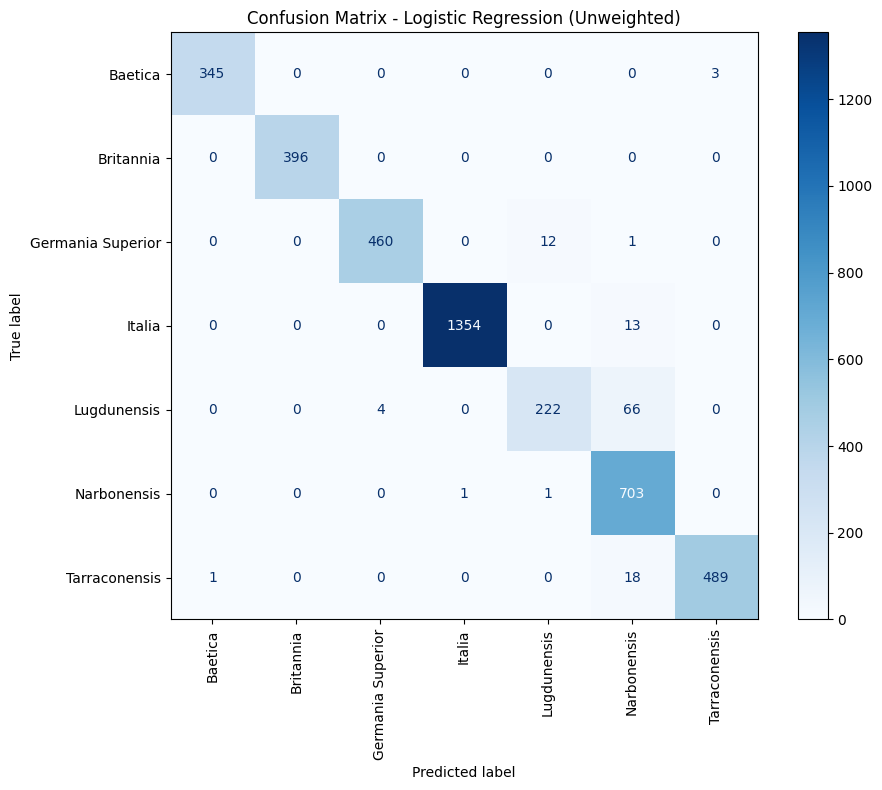

Evaluation complete.


In [62]:
# --- Further Simplified Combined Steps 4 & 5 ---
print("\n--- Running Further Simplified Combined Preprocessing and Model 1 ---")

# Make sure necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train, X_test, y_train, y_test were successfully created by Step 3

# --- Define feature columns ---
numerical_features = ['lat', 'long']
categorical_features = ['type']

# --- Debug Print for Columns (Still recommend keeping this) ---
# This will raise NameError immediately if X_train doesn't exist
print(f"DEBUG: Checking columns in X_train. Found: {X_train.columns.tolist()}")
# ---

# --- Step 4: Preprocessing ---
# These steps will raise errors if X_train/X_test are missing or columns mismatch
print("Setting up preprocessor...")
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
print("Preprocessor created.")

print("Fitting preprocessor and transforming X_train...")
X_train_processed = preprocessor.fit_transform(X_train)
print("Transforming X_test...")
X_test_processed = preprocessor.transform(X_test)
print(f"Processed shapes: X_train={X_train_processed.shape}, X_test={X_test_processed.shape}")
print("Preprocessing complete.")

# --- Step 5: Model 1 Training & Evaluation ---
print("\nInstantiating Logistic Regression (Unweighted)...")
lr_model_unweighted = LogisticRegression(max_iter=1000, random_state=42) # No class_weight

# This step will raise errors if processed data or y_train are missing/invalid
print("Training Logistic Regression (Unweighted)...")
lr_model_unweighted.fit(X_train_processed, y_train)
print("Training complete.")

print("Making predictions...")
y_pred_lr_unweighted = lr_model_unweighted.predict(X_test_processed)
print("Predictions complete.")

# --- Evaluation ---
print("\n--- Evaluation Results (LR Unweighted) ---")
# These steps will raise errors if y_test/y_pred are missing or metrics fail
accuracy_lr_unweighted = accuracy_score(y_test, y_pred_lr_unweighted)
print(f"Accuracy: {accuracy_lr_unweighted:.4f}")

print("\nClassification Report:")
class_labels = sorted(y_test.unique())
report_lr_unweighted = classification_report(y_test, y_pred_lr_unweighted, labels=class_labels, zero_division=0)
print(report_lr_unweighted)

print("\nConfusion Matrix:")
cm_lr_unweighted = confusion_matrix(y_test, y_pred_lr_unweighted, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_unweighted, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression (Unweighted)')
plt.tight_layout()
plt.show()
print("Evaluation complete.")

# Note: Removed explicit 'if var in locals()' checks before using variables.
# Kept the debug print for columns. Relies on standard Python errors if prerequisites fail.


--- Running Combined Preprocessing and Model 2: LR Weighted ---
DEBUG: Checking columns in X_train. Found: ['lat', 'long', 'type']
Setting up preprocessor...
Preprocessor created.
Fitting preprocessor and transforming X_train...
Transforming X_test...
Processed shapes: X_train=(16354, 96), X_test=(4089, 96)
Preprocessing complete.

Instantiating Logistic Regression (Weighted)...
Training Logistic Regression (Weighted)...
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Results (LR Weighted) ---
Accuracy: 0.9809

Classification Report:
                   precision    recall  f1-score   support

          Baetica       1.00      0.99      1.00       348
        Britannia       1.00      1.00      1.00       396
Germania Superior       1.00      0.96      0.98       473
           Italia       1.00      0.99      0.99      1367
      Lugdunensis       0.88      1.00      0.93       292
      Narbonensis       0.95      0.97      0.96       705
    Tarraconen

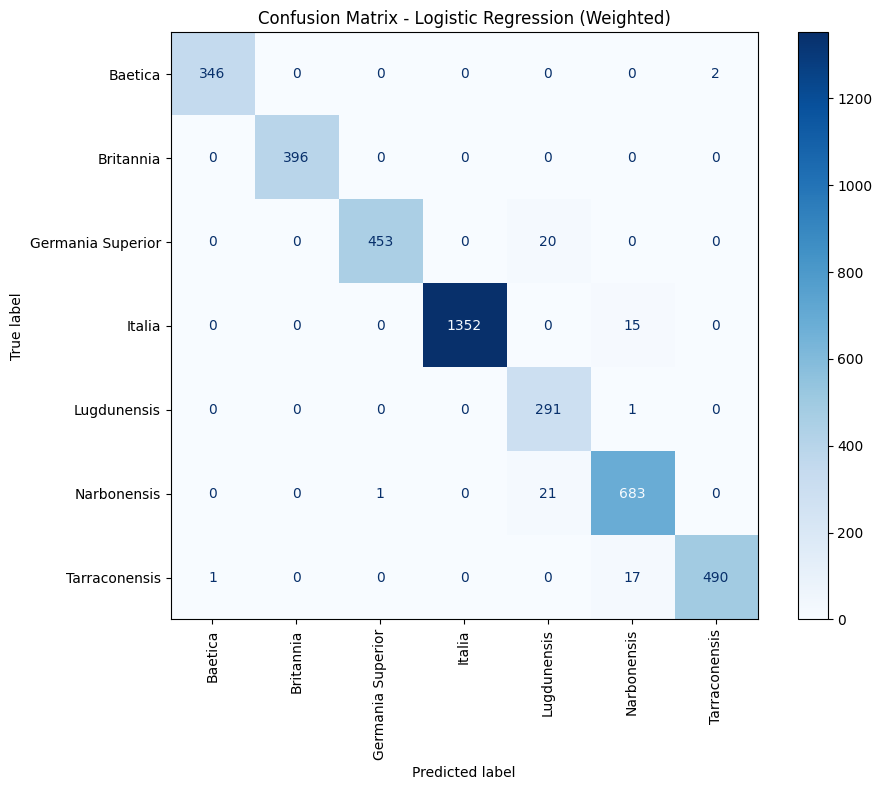

Evaluation complete.


In [63]:
# --- Combined Preprocessing + Model 2: LR Weighted ---
print("\n--- Running Combined Preprocessing and Model 2: LR Weighted ---")

# Make sure necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train, X_test, y_train, y_test exist from Step 3 (Data Split)

# --- Define feature columns ---
numerical_features = ['lat', 'long']
categorical_features = ['type']

# --- Debug Print for Columns ---
print(f"DEBUG: Checking columns in X_train. Found: {X_train.columns.tolist()}")
# ---

# --- Step 4: Preprocessing ---
# Re-running preprocessing within this block for safety
print("Setting up preprocessor...")
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
print("Preprocessor created.")

print("Fitting preprocessor and transforming X_train...")
X_train_processed = preprocessor.fit_transform(X_train)
print("Transforming X_test...")
X_test_processed = preprocessor.transform(X_test)
print(f"Processed shapes: X_train={X_train_processed.shape}, X_test={X_test_processed.shape}")
print("Preprocessing complete.")

# --- Step 5: Model 2 Training & Evaluation (LR Weighted) ---
print("\nInstantiating Logistic Regression (Weighted)...")
# *** The key change is adding class_weight='balanced' ***
lr_model_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

print("Training Logistic Regression (Weighted)...")
lr_model_weighted.fit(X_train_processed, y_train)
print("Training complete.")

print("Making predictions...")
y_pred_lr_weighted = lr_model_weighted.predict(X_test_processed)
print("Predictions complete.")

# --- Evaluation ---
print("\n--- Evaluation Results (LR Weighted) ---")
accuracy_lr_weighted = accuracy_score(y_test, y_pred_lr_weighted)
print(f"Accuracy: {accuracy_lr_weighted:.4f}")

print("\nClassification Report:")
class_labels = sorted(y_test.unique())
report_lr_weighted = classification_report(y_test, y_pred_lr_weighted, labels=class_labels, zero_division=0)
print(report_lr_weighted)

print("\nConfusion Matrix:")
cm_lr_weighted = confusion_matrix(y_test, y_pred_lr_weighted, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_weighted, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression (Weighted)')
plt.tight_layout()
plt.show()
print("Evaluation complete.")

# Note: Simplified version without outer checks. Relies on Step 3 variables existing.


--- Running Combined Preprocessing and Model 3: Random Forest Weighted ---
DEBUG: Checking columns in X_train. Found: ['lat', 'long', 'type']
Setting up preprocessor...
Preprocessor created.
Fitting preprocessor and transforming X_train...
Transforming X_test...
Processed shapes: X_train=(16354, 96), X_test=(4089, 96)
Preprocessing complete.

Instantiating Random Forest (Weighted)...
Training Random Forest (Weighted)...
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Results (Random Forest Weighted) ---
Accuracy: 0.9988

Classification Report:
                   precision    recall  f1-score   support

          Baetica       1.00      1.00      1.00       348
        Britannia       1.00      1.00      1.00       396
Germania Superior       1.00      1.00      1.00       473
           Italia       1.00      1.00      1.00      1367
      Lugdunensis       0.99      1.00      0.99       292
      Narbonensis       1.00      1.00      1.00       705
    

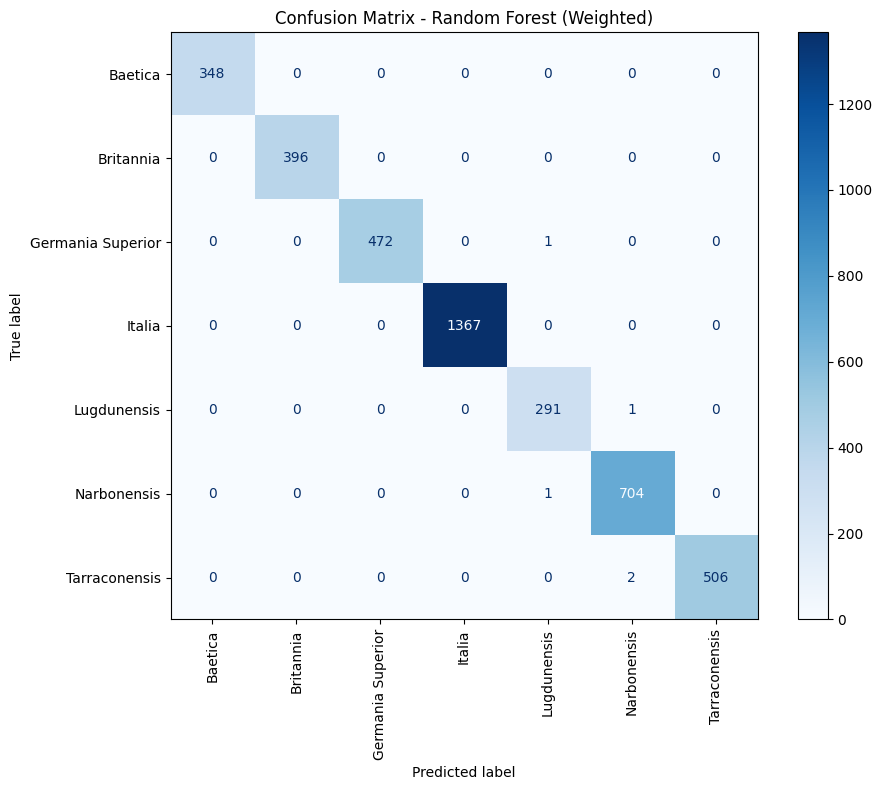

Evaluation complete.


In [64]:
# --- Combined Preprocessing + Model 3: Random Forest Weighted ---
print("\n--- Running Combined Preprocessing and Model 3: Random Forest Weighted ---")

# Make sure necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier # Changed import
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train, X_test, y_train, y_test exist from Step 3 (Data Split)

# --- Define feature columns ---
numerical_features = ['lat', 'long']
categorical_features = ['type']

# --- Debug Print for Columns ---
print(f"DEBUG: Checking columns in X_train. Found: {X_train.columns.tolist()}")
# ---

# --- Step 4: Preprocessing ---
# Re-running preprocessing within this block for safety
print("Setting up preprocessor...")
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
print("Preprocessor created.")

print("Fitting preprocessor and transforming X_train...")
X_train_processed = preprocessor.fit_transform(X_train)
print("Transforming X_test...")
X_test_processed = preprocessor.transform(X_test)
print(f"Processed shapes: X_train={X_train_processed.shape}, X_test={X_test_processed.shape}")
print("Preprocessing complete.")

# --- Step 5: Model 3 Training & Evaluation (Random Forest Weighted) ---
print("\nInstantiating Random Forest (Weighted)...")
# Using RandomForestClassifier now
# n_estimators=100 is a common default, random_state for reproducibility
# Using class_weight='balanced' as requested
# n_jobs=-1 uses all available CPU cores to potentially speed up training
rf_model_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

print("Training Random Forest (Weighted)...")
# Note: RF training might take slightly longer than Logistic Regression
rf_model_weighted.fit(X_train_processed, y_train)
print("Training complete.")

print("Making predictions...")
y_pred_rf_weighted = rf_model_weighted.predict(X_test_processed)
print("Predictions complete.")

# --- Evaluation ---
print("\n--- Evaluation Results (Random Forest Weighted) ---")
accuracy_rf_weighted = accuracy_score(y_test, y_pred_rf_weighted)
print(f"Accuracy: {accuracy_rf_weighted:.4f}")

print("\nClassification Report:")
class_labels = sorted(y_test.unique())
report_rf_weighted = classification_report(y_test, y_pred_rf_weighted, labels=class_labels, zero_division=0)
print(report_rf_weighted)

print("\nConfusion Matrix:")
cm_rf_weighted = confusion_matrix(y_test, y_pred_rf_weighted, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_weighted, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest (Weighted)')
plt.tight_layout()
plt.show()
print("Evaluation complete.")

# Note: Simplified version without outer checks. Relies on Step 3 variables existing.

In [67]:
# --- New Scenario Prediction (Within Top 7 - London Example) ---
print("\n--- Step 6b: New Scenario Prediction (London Example) ---")

import pandas as pd
import numpy as np
# Assume matplotlib.pyplot as plt is imported if needed for other parts

# Assumes 'preprocessor' (fitted ColumnTransformer),
# 'rf_model_weighted' (trained RandomForestClassifier),
# and required libraries (pandas, numpy) exist in memory from previous steps.

# 1. Define the new scenario data - London, Dressel 20
scenario_data_london = pd.DataFrame({
    'lat': [51.51],      # Approx Latitude for London
    'long': [-0.12],     # Approx Longitude for London
    'type': ['Dressel 20'] # Type commonly imported to Britannia, and was in training data
})
print("--- New Scenario (London) ---")
print(scenario_data_london)

# 2. Preprocess the scenario data using the fitted preprocessor
print("\nPreprocessing scenario data...")
# This will raise an error if 'preprocessor' doesn't exist,
# or if .transform() fails (e.g., 'Dressel 20' spelling differs from training).
scenario_london_processed = preprocessor.transform(scenario_data_london)
print(f"Processed scenario shape: {scenario_london_processed.shape}")
print("Preprocessing complete.")

# 3. Make prediction using the best model (Random Forest Weighted)
print("\nMaking prediction using Random Forest model...")
# This will raise an error if 'rf_model_weighted' doesn't exist, or if .predict() fails.
predicted_region_london = rf_model_weighted.predict(scenario_london_processed)
predicted_region_london_value = predicted_region_london[0] # Extract string value
print(f"--> Predicted Region: {predicted_region_london_value}")

# 4. Get prediction probabilities
print("\nCalculating prediction probabilities...")
# This will raise an error if model or .predict_proba() fails.
predicted_probabilities_london = rf_model_weighted.predict_proba(scenario_london_processed)
# Use the model's learned classes attribute for reliable mapping
probability_dict_london = dict(zip(rf_model_weighted.classes_, predicted_probabilities_london[0]))
# Sort probabilities descending for display
sorted_probabilities_london = sorted(probability_dict_london.items(), key=lambda item: item[1], reverse=True)

print("\nProbabilities per Region:")
for region, prob in sorted_probabilities_london:
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")

# 5. Explain the prediction
print("\n--- Explanation of Prediction ---")
print(f"For a new find in central London (Lat: 51.51, Long: -0.12) identified as pottery type 'Dressel 20',")
print(f"our trained Random Forest model predicts the find belongs to the Roman province of: **{predicted_region_london_value}**.")
# Get the top probability correctly
top_prob_london = sorted_probabilities_london[0][1]
print(f"The model assigned a probability of {top_prob_london:.2%} to this prediction.")
print(f"Given the model's very high overall accuracy (~99.9%), this prediction is expected to be highly reliable.")

# Add specific historical context based on the prediction
if predicted_region_london_value == 'Britannia':
    print(f"(Historical Context: This prediction aligns perfectly with expectations. Londinium (London) was a major center in Roman Britannia, and 'Dressel 20' amphorae, originating mainly from Baetica in Spain, were very heavily imported into Britain.)")
else:
    # Add context if the prediction is something else unexpectedly
    print(f"(Historical Context: The model predicted {predicted_region_london_value}. While 'Dressel 20' was widely traded, finding it in London would most typically associate it with Britannia.)")

print("\nScenario prediction complete.")


--- Step 6b: New Scenario Prediction (London Example) ---
--- New Scenario (London) ---
     lat  long        type
0  51.51 -0.12  Dressel 20

Preprocessing scenario data...
Processed scenario shape: (1, 96)
Preprocessing complete.

Making prediction using Random Forest model...
--> Predicted Region: Italia

Calculating prediction probabilities...

Probabilities per Region:
  - Italia: 0.6700 (67.00%)
  - Tarraconensis: 0.2300 (23.00%)
  - Baetica: 0.1000 (10.00%)
  - Britannia: 0.0000 (0.00%)
  - Germania Superior: 0.0000 (0.00%)
  - Lugdunensis: 0.0000 (0.00%)
  - Narbonensis: 0.0000 (0.00%)

--- Explanation of Prediction ---
For a new find in central London (Lat: 51.51, Long: -0.12) identified as pottery type 'Dressel 20',
our trained Random Forest model predicts the find belongs to the Roman province of: **Italia**.
The model assigned a probability of 67.00% to this prediction.
Given the model's very high overall accuracy (~99.9%), this prediction is expected to be highly reliable


--- Running Preprocessing + Manual Oversampling + RF (Simplified Error Handling) ---
DEBUG: Checking columns in X_train. Found: ['lat', 'long', 'type']

Fitting preprocessor and transforming X_train...
Transforming X_test using fitted preprocessor...
Processed shapes before resampling: X_train=(16354, 96), X_test=(4089, 96)
Preprocessing complete.

Performing manual oversampling by duplication...
Majority class 'Italia' count (target count): 5465
Kept original 5465 samples for majority class 'Italia'.
Resampling class 'Baetica' from 1394 samples up to 5465...
Resampling class 'Britannia' from 1585 samples up to 5465...
Resampling class 'Germania Superior' from 1892 samples up to 5465...
Resampling class 'Lugdunensis' from 1169 samples up to 5465...
Resampling class 'Narbonensis' from 2820 samples up to 5465...
Resampling class 'Tarraconensis' from 2029 samples up to 5465...

Resampled training data shape: X=(38255, 96), y=(38255,)
Class distribution after manual resampling:
name
Baeti

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


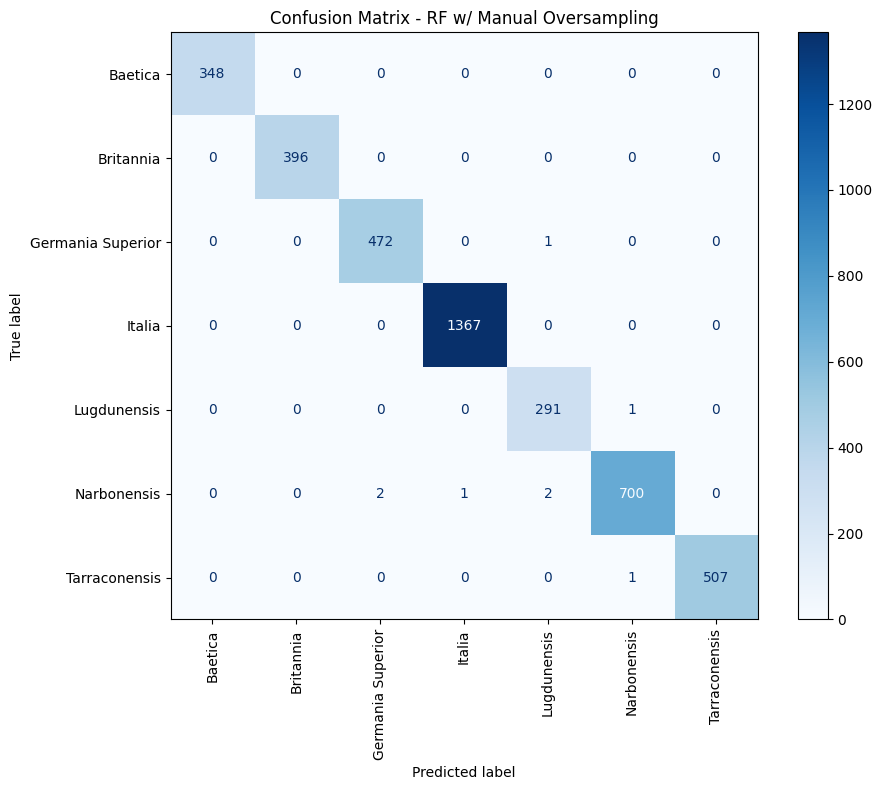

Evaluation complete.


In [68]:
# --- Manual Oversampling + RF (Stripped Error Handling) ---
print("\n--- Running Preprocessing + Manual Oversampling + RF (Simplified Error Handling) ---")
print("WARNING: Simple oversampling by duplication is being used. This carries a risk of overfitting.")
print("WARNING: Explicit error checks removed. Code will stop with standard Python errors if prerequisites are missing or steps fail.")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample # For simple oversampling

# Assuming X_train, X_test, y_train, y_test exist from Step 3
# Assuming 'preprocessor' (ColumnTransformer object) is defined

# --- Define feature columns ---
numerical_features = ['lat', 'long']
categorical_features = ['type']
target_col = 'name'
# This line will fail if X_train doesn't exist
print(f"DEBUG: Checking columns in X_train. Found: {X_train.columns.tolist()}")

# --- Preprocessing ---
print("\nFitting preprocessor and transforming X_train...")
# These lines will fail if 'preprocessor' or 'X_train' / 'X_test' don't exist,
# or if preprocessing fails for other reasons (e.g., column mismatch).
X_train_processed = preprocessor.fit_transform(X_train)
print("Transforming X_test using fitted preprocessor...")
X_test_processed = preprocessor.transform(X_test)
print(f"Processed shapes before resampling: X_train={X_train_processed.shape}, X_test={X_test_processed.shape}")
# This line will fail if get_feature_names_out is not supported or fails
feature_names_out = preprocessor.get_feature_names_out()
print("Preprocessing complete.")

# --- Manual Oversampling of Training Data ---
print("\nPerforming manual oversampling by duplication...")
# These lines will fail if X_train_processed or y_train don't exist or alignment fails.
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_out, index=y_train.index)
train_data_processed = pd.concat([X_train_processed_df, y_train], axis=1)

# These lines will fail if y_train doesn't exist or is empty.
majority_class_label = y_train.value_counts().idxmax()
target_count = y_train.value_counts().max()
print(f"Majority class '{majority_class_label}' count (target count): {target_count}")

resampled_list = []
majority_data = train_data_processed[train_data_processed[target_col] == majority_class_label]
resampled_list.append(majority_data)
print(f"Kept original {len(majority_data)} samples for majority class '{majority_class_label}'.")

minority_classes = y_train.value_counts().index.difference([majority_class_label])

# This loop will fail if data filtering or resampling fails.
for cls in minority_classes:
    cls_data = train_data_processed[train_data_processed[target_col] == cls]
    print(f"Resampling class '{cls}' from {len(cls_data)} samples up to {target_count}...")
    resampled_cls = resample(cls_data,
                             replace=True,             # Sample WITH replacement
                             n_samples=target_count,   # Match majority count
                             random_state=42)
    resampled_list.append(resampled_cls)

# This will fail if list is empty or concatenation fails.
train_data_resampled = pd.concat(resampled_list)
train_data_resampled = train_data_resampled.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle

# These lines will fail if target_col is missing.
y_train_resampled = train_data_resampled[target_col]
X_train_resampled = train_data_resampled.drop(columns=[target_col])

print(f"\nResampled training data shape: X={X_train_resampled.shape}, y={y_train_resampled.shape}")
print("Class distribution after manual resampling:")
print(y_train_resampled.value_counts().sort_index())
print("Manual oversampling complete.")


# --- Train RF on Resampled Data ---
print("\nInstantiating Random Forest (No Class Weight)...")
rf_model_resampled = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # No class_weight

# This will fail if resampled data doesn't exist or model fitting fails.
print("Training Random Forest on Resampled data...")
rf_model_resampled.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

# --- Evaluate on Original Processed Test Set ---
print("\nMaking predictions on the original (unbalanced), processed test set...")
# This will fail if X_test_processed doesn't exist or prediction fails.
y_pred_rf_resampled = rf_model_resampled.predict(X_test_processed)
print("Predictions complete.")

# --- Evaluation ---
print("\n--- Evaluation Results (Random Forest with Manual Oversampling) ---")
# These lines will fail if y_test/y_pred don't exist or metrics fail.
accuracy_rf_resampled = accuracy_score(y_test, y_pred_rf_resampled)
print(f"Accuracy: {accuracy_rf_resampled:.4f}")

print("\nClassification Report:")
class_labels = sorted(y_test.unique())
report_rf_resampled = classification_report(y_test, y_pred_rf_resampled, labels=class_labels, zero_division=0)
print(report_rf_resampled)

print("\nConfusion Matrix:")
cm_rf_resampled = confusion_matrix(y_test, y_pred_rf_resampled, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_resampled, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 8))
# This line will fail if plotting fails.
disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues', values_format='d')
plt.title('Confusion Matrix - RF w/ Manual Oversampling')
plt.tight_layout()
plt.show()
print("Evaluation complete.")

In [71]:
# --- Scenario Prediction using Weighted Logistic Regression ---
print("\n--- Step 8: Scenario Prediction (London) using Weighted Logistic Regression ---")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Keep for potential use / context
from sklearn.metrics import ConfusionMatrixDisplay # Keep for potential use / context

# Assumes 'preprocessor' (fitted ColumnTransformer), and
# 'lr_model_weighted' (Weighted LR model trained earlier) exist in memory.

# 1. Define the London scenario data
scenario_data_london = pd.DataFrame({
    'lat': [51.51],
    'long': [-0.12],
    'type': ['Dressel 20']
})
print("--- New Scenario (London) ---")
print(scenario_data_london)

# 2. Preprocess the scenario data
# Will fail if 'preprocessor' doesn't exist or transform fails.
print("\nPreprocessing scenario data...")
scenario_london_processed = preprocessor.transform(scenario_data_london)
print(f"Processed scenario shape: {scenario_london_processed.shape}")
print("Preprocessing complete.")

# 3. Make prediction using the Weighted Logistic Regression model
# Will fail if 'lr_model_weighted' doesn't exist or predict fails.
print("\nMaking prediction using Weighted LR model...")
predicted_region_london_lrw = lr_model_weighted.predict(scenario_london_processed)
predicted_region_london_lrw_value = predicted_region_london_lrw[0] # Extract string value
print(f"--> Predicted Region: {predicted_region_london_lrw_value}")

# 4. Get prediction probabilities
# Will fail if model or predict_proba fails.
print("\nCalculating prediction probabilities...")
predicted_probabilities_london_lrw = lr_model_weighted.predict_proba(scenario_london_processed)
# Use the model's learned classes attribute for reliable mapping
probability_dict_london_lrw = dict(zip(lr_model_weighted.classes_, predicted_probabilities_london_lrw[0]))
# Sort probabilities descending for display
sorted_probabilities_london_lrw = sorted(probability_dict_london_lrw.items(), key=lambda item: item[1], reverse=True)

print("\nProbabilities per Region:")
for region, prob in sorted_probabilities_london_lrw:
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")

# 5. Explain the prediction
print("\n--- Explanation of Prediction (Weighted LR) ---")
print(f"For the London find (Lat: 51.51, Long: -0.12, Type: 'Dressel 20'),")
print(f"the **Weighted Logistic Regression** model predicts the region: **{predicted_region_london_lrw_value}**.")
top_prob_london_lrw = sorted_probabilities_london_lrw[0][1]
print(f"The model assigned a probability of {top_prob_london_lrw:.2%} to this prediction.")
# Recall test set accuracy for *this* specific model
print(f"The test set accuracy for this Weighted LR model was good (~98.1%).")

# Compare to expectations and RF results
if predicted_region_london_lrw_value == 'Britannia':
    print(f"(RESULT: This prediction **aligns with historical/geographical expectations!**)")
    print(f"(INTERPRETATION: Unlike the Random Forest models tested, the Weighted Logistic Regression generalized correctly for this specific scenario.)")
elif predicted_region_london_lrw_value == 'Italia':
    print(f"(RESULT: This prediction is also **'Italia'**, similar to the Random Forest models.)")
    print(f"(INTERPRETATION: This further strengthens the idea that the issue might be data-related or feature-related, as multiple model types make the same counter-intuitive prediction.)")
else:
    print(f"(RESULT: The model predicted **{predicted_region_london_lrw_value}**.)")
    print(f"(INTERPRETATION: This prediction differs from both expectations and the RF models, requiring further analysis.)")

print("\nScenario prediction complete.")


--- Step 8: Scenario Prediction (London) using Weighted Logistic Regression ---
--- New Scenario (London) ---
     lat  long        type
0  51.51 -0.12  Dressel 20

Preprocessing scenario data...
Processed scenario shape: (1, 96)
Preprocessing complete.

Making prediction using Weighted LR model...
--> Predicted Region: Tarraconensis

Calculating prediction probabilities...

Probabilities per Region:
  - Tarraconensis: 1.0000 (100.00%)
  - Italia: 0.0000 (0.00%)
  - Baetica: 0.0000 (0.00%)
  - Narbonensis: 0.0000 (0.00%)
  - Germania Superior: 0.0000 (0.00%)
  - Lugdunensis: 0.0000 (0.00%)
  - Britannia: 0.0000 (0.00%)

--- Explanation of Prediction (Weighted LR) ---
For the London find (Lat: 51.51, Long: -0.12, Type: 'Dressel 20'),
the **Weighted Logistic Regression** model predicts the region: **Tarraconensis**.
The model assigned a probability of 100.00% to this prediction.
The test set accuracy for this Weighted LR model was good (~98.1%).
(RESULT: The model predicted **Tarraconen

In [74]:
# --- Combined FE + Preprocessing + Models (Top N) - FINAL OUTPUT ONLY ---
print("\n--- Training and Evaluating Models with Top N Features (Final Results Only) ---")

# Imports
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt # Only needed if plotting confusion matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score #, confusion_matrix, ConfusionMatrixDisplay

# Assuming data_top7 (DataFrame filtered to top 7 regions),
# and X_train, X_test, y_train, y_test (split from X = data_top7[['lat', 'long', 'type']]) exist

# --- Parameters ---
N_TOP_SITES = 20
N_TOP_CODES = 30
target_col = 'name'
numerical_features = ['lat', 'long']
categorical_features = ['type']

# --- Step A: Identify Top N Categories ---
train_sites_series = data_top7.loc[X_train.index, 'site']
train_codes_series = data_top7.loc[X_train.index, 'code'].fillna('MISSING') # Handle NaNs
top_sites = train_sites_series.value_counts().nlargest(N_TOP_SITES).index.tolist()
top_codes = train_codes_series.value_counts().nlargest(N_TOP_CODES).index.tolist()

# --- Step B: Create New Binary Features ---
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()
train_sites_col = data_top7.loc[X_train_eng.index, 'site']
test_sites_col = data_top7.loc[X_test_eng.index, 'site']
train_codes_col = data_top7.loc[X_train_eng.index, 'code'].fillna('MISSING')
test_codes_col = data_top7.loc[X_test_eng.index, 'code'].fillna('MISSING')

site_feature_names = []
for site in top_sites:
    safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
    feature_name = f'IsSite_{safe_site_name}'
    X_train_eng[feature_name] = np.where(train_sites_col == site, 1, 0)
    X_test_eng[feature_name] = np.where(test_sites_col == site, 1, 0)
    site_feature_names.append(feature_name)

code_feature_names = []
for code in top_codes:
    safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
    feature_name = f'IsCode_{safe_code_name}'
    X_train_eng[feature_name] = np.where(train_codes_col == code, 1, 0)
    X_test_eng[feature_name] = np.where(test_codes_col == code, 1, 0)
    code_feature_names.append(feature_name)

binary_features = site_feature_names + code_feature_names

# --- Step C: Update Preprocessor ---
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# --- Step D: Preprocess Data ---
X_train_processed_eng = preprocessor_eng.fit_transform(X_train_eng)
X_test_processed_eng = preprocessor_eng.transform(X_test_eng)

# --- Step E: Train & Evaluate Weighted Logistic Regression ---
lr_model_weighted_eng = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model_weighted_eng.fit(X_train_processed_eng, y_train)
y_pred_lr_weighted_eng = lr_model_weighted_eng.predict(X_test_processed_eng)
accuracy_lr_w_eng = accuracy_score(y_test, y_pred_lr_weighted_eng)
# --- RESULTS FOR LR ---
print(f"\n--- Results: Weighted Logistic Regression w/ Top N Features ---")
print(f"Accuracy: {accuracy_lr_w_eng:.4f}")
print("\nClassification Report:")
class_labels = sorted(y_test.unique())
print(classification_report(y_test, y_pred_lr_weighted_eng, labels=class_labels, zero_division=0))
print("-" * 60)

# --- Step F: Train & Evaluate Weighted Random Forest ---
rf_model_weighted_eng = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_weighted_eng.fit(X_train_processed_eng, y_train)
y_pred_rf_weighted_eng = rf_model_weighted_eng.predict(X_test_processed_eng)
accuracy_rf_w_eng = accuracy_score(y_test, y_pred_rf_weighted_eng)
# --- RESULTS FOR RF ---
print(f"\n--- Results: Weighted Random Forest w/ Top N Features ---")
print(f"Accuracy: {accuracy_rf_w_eng:.4f}")
print("\nClassification Report:")
# class_labels reused from above
print(classification_report(y_test, y_pred_rf_weighted_eng, labels=class_labels, zero_division=0))
print("-" * 60)

print("\nModel evaluations complete.")


--- Training and Evaluating Models with Top N Features (Final Results Only) ---

--- Results: Weighted Logistic Regression w/ Top N Features ---
Accuracy: 0.9878

Classification Report:
                   precision    recall  f1-score   support

          Baetica       1.00      1.00      1.00       348
        Britannia       1.00      1.00      1.00       396
Germania Superior       0.99      0.97      0.98       473
           Italia       1.00      0.99      0.99      1367
      Lugdunensis       0.96      0.98      0.97       292
      Narbonensis       0.97      0.99      0.98       705
    Tarraconensis       0.99      0.98      0.99       508

         accuracy                           0.99      4089
        macro avg       0.99      0.99      0.99      4089
     weighted avg       0.99      0.99      0.99      4089

------------------------------------------------------------

--- Results: Weighted Random Forest w/ Top N Features ---
Accuracy: 0.9983

Classification Report:


In [79]:
# --- FINAL Combined Block V2: FE + Preproc + Train RF-W + Predict "Strong" Italia Scenario ---
print("\n--- FINAL RUN V2: Re-calculating prerequisites and predicting 'Strong Italia' scenario with Weighted RF ---")
print("Using a scenario with a real, common code ('VISELLI') as requested.")
print("WARNING: ALL error checks removed. Code will fail with standard Python errors if prerequisites are missing or steps fail.")
print("This block re-does feature engineering, preprocessing, and model training internally.")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- ASSUMPTIONS ---
# Assumes data_top7 (DataFrame filtered to top 7 regions),
# and X_train, X_test, y_train, y_test (split from X = data_top7[['lat', 'long', 'type']]) exist in memory from prior steps.

# --- Parameters ---
N_TOP_SITES = 20
N_TOP_CODES = 30
target_col = 'name'
numerical_features = ['lat', 'long']
categorical_features = ['type']

# --- Re-calculate Prerequisites within this block ---

# Step A: Identify Top N Categories from Training Data
train_sites_series = data_top7.loc[X_train.index, 'site']
# Use fillna for value_counts, but keep original NaNs for feature creation if needed? No, fillna needed there too.
train_codes_series = data_top7.loc[X_train.index, 'code'].fillna('MISSING')
top_sites = train_sites_series.value_counts().nlargest(N_TOP_SITES).index.tolist()
top_codes = train_codes_series.value_counts().nlargest(N_TOP_CODES).index.tolist()

# Step B: Create New Binary Features for Train/Test
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()
# Get corresponding original columns using indices, handling NaNs for codes
train_sites_col = data_top7.loc[X_train_eng.index, 'site']
test_sites_col = data_top7.loc[X_test_eng.index, 'site']
train_codes_col = data_top7.loc[X_train_eng.index, 'code'].fillna('MISSING')
test_codes_col = data_top7.loc[X_test_eng.index, 'code'].fillna('MISSING')
site_feature_names = []
for site in top_sites:
    safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
    feature_name = f'IsSite_{safe_site_name}'
    X_train_eng[feature_name] = np.where(train_sites_col == site, 1, 0)
    X_test_eng[feature_name] = np.where(test_sites_col == site, 1, 0)
    site_feature_names.append(feature_name)
code_feature_names = []
for code in top_codes:
    safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
    feature_name = f'IsCode_{safe_code_name}'
    X_train_eng[feature_name] = np.where(train_codes_col == code, 1, 0)
    X_test_eng[feature_name] = np.where(test_codes_col == code, 1, 0)
    code_feature_names.append(feature_name)
binary_features = site_feature_names + code_feature_names

# Step C: Define Preprocessor
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# Step D: Preprocess Data
X_train_processed_eng = preprocessor_eng.fit_transform(X_train_eng)
X_test_processed_eng = preprocessor_eng.transform(X_test_eng)

# Step E: Train Weighted Random Forest Model
rf_model_weighted_eng = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_weighted_eng.fit(X_train_processed_eng, y_train)

# --- Scenario Prediction Steps ---
# 1. Define "Strong Signal" Scenario Data using REAL code 'VISELLI'
scenario_lat = 40.70       # Near Canale Giancola/Brindisi
scenario_long = 17.80      # Near Canale Giancola/Brindisi
scenario_type = 'Brindisian amphora' # Strongly associated type
scenario_site = 'Canale Giancola' # Top site for VISELLI / Italia
scenario_code = 'VISELLI'      # <<< Using the real, top code >>>

scenario_data_strong = pd.DataFrame({
    'lat': [scenario_lat], 'long': [scenario_long], 'type': [scenario_type],
    'site': [scenario_site], 'code': [scenario_code]
})
print("\n--- Scenario Defined (Strong Italia Signal w/ Real Code 'VISELLI') ---")
print(scenario_data_strong)

# 2. Add Binary Features to Scenario Data
scenario_data_eng = scenario_data_strong.copy()
# Initialize binary columns to 0 first
binary_feature_names_all = ['IsSite_' + "".join(c if c.isalnum() else "_" for c in str(s)) for s in top_sites] + \
                           ['IsCode_' + "".join(c if c.isalnum() else "_" for c in str(c)) for c in top_codes]
for feature_name in binary_feature_names_all:
     # Add column if it doesn't exist, initialize to 0
     if feature_name not in scenario_data_eng.columns: scenario_data_eng[feature_name] = 0
     else: scenario_data_eng[feature_name] = 0 # Ensure reset if re-running cell

# Set relevant site features to 1
for site in top_sites: # Use the 'top_sites' list calculated above
    if scenario_data_eng.loc[0, 'site'] == site:
        safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
        feature_name = f'IsSite_{safe_site_name}'
        if feature_name in scenario_data_eng.columns: scenario_data_eng.loc[0, feature_name] = 1
# Set relevant code features to 1
for code in top_codes: # Use the 'top_codes' list calculated above
    if scenario_data_eng.loc[0, 'code'] == code: # Now checks for 'VISELLI'
        safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
        feature_name = f'IsCode_{safe_code_name}'
        if feature_name in scenario_data_eng.columns: scenario_data_eng.loc[0, feature_name] = 1

# 3. Preprocess Scenario Data using the fitted preprocessor_eng
scenario_strong_processed = preprocessor_eng.transform(scenario_data_eng)

# 4. Make Prediction using the trained rf_model_weighted_eng
predicted_region_strong = rf_model_weighted_eng.predict(scenario_strong_processed)
predicted_region_strong_value = predicted_region_strong[0]
print(f"\n--> Predicted Region: {predicted_region_strong_value}")

# 5. Get Probabilities
predicted_probabilities_strong = rf_model_weighted_eng.predict_proba(scenario_strong_processed)
probability_dict_strong = dict(zip(rf_model_weighted_eng.classes_, predicted_probabilities_strong[0]))
sorted_probabilities_strong = sorted(probability_dict_strong.items(), key=lambda item: item[1], reverse=True)
print("\nProbabilities per Region:")
for region, prob in sorted_probabilities_strong:
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")

# 6. Explain
print(f"\nScenario ('Strong Italia' Signal w/ code 'VISELLI') prediction using Weighted RF w/ Top N Feat: **{predicted_region_strong_value}**")
if predicted_region_strong_value == 'Italia':
    print("(RESULT: Prediction aligns perfectly with expectations for this strong signal.)")
else:
    print("(RESULT: Prediction differs from expectation, indicating potential issues even for clear cases.)")

print("\nScenario prediction run complete.")


--- FINAL RUN V2: Re-calculating prerequisites and predicting 'Strong Italia' scenario with Weighted RF ---
Using a scenario with a real, common code ('VISELLI') as requested.
This block re-does feature engineering, preprocessing, and model training internally.

--- Scenario Defined (Strong Italia Signal w/ Real Code 'VISELLI') ---
    lat  long                type             site     code
0  40.7  17.8  Brindisian amphora  Canale Giancola  VISELLI

--> Predicted Region: Italia

Probabilities per Region:
  - Italia: 0.9700 (97.00%)
  - Tarraconensis: 0.0200 (2.00%)
  - Baetica: 0.0100 (1.00%)
  - Britannia: 0.0000 (0.00%)
  - Germania Superior: 0.0000 (0.00%)
  - Lugdunensis: 0.0000 (0.00%)
  - Narbonensis: 0.0000 (0.00%)

Scenario ('Strong Italia' Signal w/ code 'VISELLI') prediction using Weighted RF w/ Top N Feat: **Italia**
(RESULT: Prediction aligns perfectly with expectations for this strong signal.)

Scenario prediction run complete.


In [80]:
# --- FINAL Combined Block V3: FE + Preproc + Train RF-W + Predict Britannia Scenario ---
print("\n--- FINAL RUN V3: Re-calculating prerequisites and predicting Britannia scenario with Weighted RF ---")
print("Using a scenario for London with a real code ('ACIRGI') found on Dressel 20 amphorae there.")
print("WARNING: ALL error checks removed. Code will fail with standard Python errors if prerequisites are missing or steps fail.")
print("This block re-does feature engineering, preprocessing, and model training internally.")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- ASSUMPTIONS ---
# Assumes data_top7, X_train, X_test, y_train, y_test exist from Steps 1, 2, 3

# --- Parameters ---
N_TOP_SITES = 20
N_TOP_CODES = 30
target_col = 'name'
numerical_features = ['lat', 'long']
categorical_features = ['type']

# --- Re-calculate Prerequisites within this block ---

# Step A: Identify Top N Categories
train_sites_series = data_top7.loc[X_train.index, 'site']
train_codes_series = data_top7.loc[X_train.index, 'code'].fillna('MISSING')
top_sites = train_sites_series.value_counts().nlargest(N_TOP_SITES).index.tolist()
top_codes = train_codes_series.value_counts().nlargest(N_TOP_CODES).index.tolist()
# print(f"DEBUG: Top 30 Codes: {top_codes}") # Verify ACIRGI is likely in here if needed

# Step B: Create Binary Features for Train/Test
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()
train_sites_col = data_top7.loc[X_train_eng.index, 'site']
test_sites_col = data_top7.loc[X_test_eng.index, 'site']
train_codes_col = data_top7.loc[X_train_eng.index, 'code'].fillna('MISSING')
test_codes_col = data_top7.loc[X_test_eng.index, 'code'].fillna('MISSING')
site_feature_names = []
for site in top_sites:
    safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
    feature_name = f'IsSite_{safe_site_name}'
    X_train_eng[feature_name] = np.where(train_sites_col == site, 1, 0)
    X_test_eng[feature_name] = np.where(test_sites_col == site, 1, 0)
    site_feature_names.append(feature_name)
code_feature_names = []
for code in top_codes:
    safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
    feature_name = f'IsCode_{safe_code_name}'
    X_train_eng[feature_name] = np.where(train_codes_col == code, 1, 0)
    X_test_eng[feature_name] = np.where(test_codes_col == code, 1, 0)
    code_feature_names.append(feature_name)
binary_features = site_feature_names + code_feature_names

# Step C: Define Preprocessor
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# Step D: Preprocess Data
X_train_processed_eng = preprocessor_eng.fit_transform(X_train_eng)
X_test_processed_eng = preprocessor_eng.transform(X_test_eng)

# Step E: Train Weighted Random Forest Model
rf_model_weighted_eng = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_weighted_eng.fit(X_train_processed_eng, y_train)

# --- Scenario Prediction Steps ---
# 1. Define Britannia Scenario Data using REAL code 'ACIRGI'
scenario_lat = 51.51        # London
scenario_long = -0.12       # London
scenario_type = 'Dressel 20' # Common import
scenario_site = 'London'    # Assume 'London' is a Top 20 site
scenario_code = 'ACIRGI'     # Code found on D20 in London, was in Top 30

scenario_data_britain = pd.DataFrame({
    'lat': [scenario_lat], 'long': [scenario_long], 'type': [scenario_type],
    'site': [scenario_site], 'code': [scenario_code]
})
print("\n--- Scenario Defined (Britannia Signal w/ Real Code 'ACIRGI') ---")
print(scenario_data_britain)

# 2. Add Binary Features to Scenario Data
scenario_data_eng = scenario_data_britain.copy()
binary_feature_names_all = ['IsSite_' + "".join(c if c.isalnum() else "_" for c in str(s)) for s in top_sites] + \
                           ['IsCode_' + "".join(c if c.isalnum() else "_" for c in str(c)) for c in top_codes]
# Initialize all new binary columns to 0
for feature_name in binary_feature_names_all:
     if feature_name not in scenario_data_eng.columns: scenario_data_eng[feature_name] = 0
     else: scenario_data_eng[feature_name] = 0 # Ensure reset if re-running cell
# Set relevant site feature to 1
safe_site_name_scenario = "".join(c if c.isalnum() else "_" for c in str(scenario_site))
feature_name_site_scenario = f'IsSite_{safe_site_name_scenario}'
if feature_name_site_scenario in scenario_data_eng.columns: scenario_data_eng.loc[0, feature_name_site_scenario] = 1
# Set relevant code feature to 1
safe_code_name_scenario = "".join(c if c.isalnum() else "_" for c in str(scenario_code))
feature_name_code_scenario = f'IsCode_{safe_code_name_scenario}'
if feature_name_code_scenario in scenario_data_eng.columns: scenario_data_eng.loc[0, feature_name_code_scenario] = 1

# 3. Preprocess Scenario Data using the fitted preprocessor_eng
scenario_britain_processed = preprocessor_eng.transform(scenario_data_eng)

# 4. Make Prediction using the trained rf_model_weighted_eng
predicted_region_britain = rf_model_weighted_eng.predict(scenario_britain_processed)
predicted_region_britain_value = predicted_region_britain[0]
print(f"\n--> Predicted Region: {predicted_region_britain_value}")

# 5. Get Probabilities
predicted_probabilities_britain = rf_model_weighted_eng.predict_proba(scenario_britain_processed)
probability_dict_britain = dict(zip(rf_model_weighted_eng.classes_, predicted_probabilities_britain[0]))
sorted_probabilities_britain = sorted(probability_dict_britain.items(), key=lambda item: item[1], reverse=True)
print("\nProbabilities per Region:")
for region, prob in sorted_probabilities_britain:
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")

# 6. Explain
print(f"\nScenario (Britannia Signal w/ code 'ACIRGI') prediction using Weighted RF w/ Top N Feat: **{predicted_region_britain_value}**")
if predicted_region_britain_value == 'Britannia':
    print("(RESULT: Prediction aligns perfectly with expectations for this scenario.)")
else:
    print("(RESULT: Prediction differs from expectation, even with a known code found in London.)")

print("\nScenario prediction run complete.")


--- FINAL RUN V3: Re-calculating prerequisites and predicting Britannia scenario with Weighted RF ---
Using a scenario for London with a real code ('ACIRGI') found on Dressel 20 amphorae there.
This block re-does feature engineering, preprocessing, and model training internally.

--- Scenario Defined (Britannia Signal w/ Real Code 'ACIRGI') ---
     lat  long        type    site    code
0  51.51 -0.12  Dressel 20  London  ACIRGI

--> Predicted Region: Italia

Probabilities per Region:
  - Italia: 0.4400 (44.00%)
  - Britannia: 0.3100 (31.00%)
  - Tarraconensis: 0.1300 (13.00%)
  - Baetica: 0.0600 (6.00%)
  - Germania Superior: 0.0400 (4.00%)
  - Narbonensis: 0.0200 (2.00%)
  - Lugdunensis: 0.0000 (0.00%)

Scenario (Britannia Signal w/ code 'ACIRGI') prediction using Weighted RF w/ Top N Feat: **Italia**
(RESULT: Prediction differs from expectation, even with a known code found in London.)

Scenario prediction run complete.


In [85]:
# --- FINAL EXPERIMENT: Remove Italia, Retrain RF-W, Predict Britannia ---
print("\n--- FINAL EXPERIMENT: Removing 'Italia', Retraining RF-W (Top N Feat), Predicting Britannia Scenario ---")
print("WARNING: ALL error checks removed. Code will fail with standard Python errors if prerequisites are missing or steps fail.")
print("This single block performs all steps: filtering (no Italia), splitting, feature engineering, preprocessing, training, evaluation, scenario prediction.")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# --- ASSUMPTIONS ---
# Assumes 'data' (the *original* full DataFrame before any filtering) exists in memory.

# --- Parameters ---
N_TOP_SITES = 20
N_TOP_CODES = 30
target_col = 'name'
numerical_features = ['lat', 'long']
original_categorical_feature = 'type' # Only 'type' initially
test_set_size_ni = 0.20
random_seed_ni = 42

# --- Step 0: Filter out 'Italia' ---
data_no_italia = data[data[target_col] != 'Italia'].copy()

# --- Step 1 (Mod): Filter for Top 6 Regions (Original Top 7 minus Italia) ---
top_6_regions_ni = ['Narbonensis', 'Tarraconensis', 'Germania Superior', 'Britannia', 'Baetica', 'Lugdunensis']
data_top6_ni = data_no_italia[data_no_italia[target_col].isin(top_6_regions_ni)].copy()

# --- Step 2 (Mod): Define X and y ---
# Keep original columns needed for feature engineering in X_orig first
feature_cols_orig = ['lat', 'long', 'type', 'site', 'code']
# Check if all needed columns exist in data_top6_ni before proceeding
if not all(col in data_top6_ni.columns for col in feature_cols_orig):
     raise ValueError(f"Original data (after filtering) is missing one of required columns: {feature_cols_orig}")
X_orig = data_top6_ni[feature_cols_orig]
y = data_top6_ni[target_col]

# --- Step 3 (Mod): Split ---
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_orig, y, test_size=test_set_size_ni, random_state=random_seed_ni, stratify=y
)

# --- Step A (Mod): Identify Top N from new training data ---
train_sites_series_ni = X_train_orig['site']
train_codes_series_ni = X_train_orig['code'].fillna('MISSING')
top_sites_ni = train_sites_series_ni.value_counts().nlargest(N_TOP_SITES).index.tolist()
top_codes_ni = train_codes_series_ni.value_counts().nlargest(N_TOP_CODES).index.tolist()

# --- Step B (Mod): Create Binary Features ---
# Start with only the features intended for the model initially ('lat', 'long', 'type')
X_train_eng_ni = X_train_orig[['lat', 'long', 'type']].copy()
X_test_eng_ni = X_test_orig[['lat', 'long', 'type']].copy()
# Get site/code columns from the *_orig* splits for checking conditions
train_sites_col_ni = X_train_orig['site']
test_sites_col_ni = X_test_orig['site']
train_codes_col_ni = X_train_orig['code'].fillna('MISSING')
test_codes_col_ni = X_test_orig['code'].fillna('MISSING')
# Add binary features
site_feature_names_ni = []
for site in top_sites_ni:
    safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
    feature_name = f'IsSite_{safe_site_name}'
    X_train_eng_ni[feature_name] = np.where(train_sites_col_ni == site, 1, 0)
    X_test_eng_ni[feature_name] = np.where(test_sites_col_ni == site, 1, 0)
    site_feature_names_ni.append(feature_name)
code_feature_names_ni = []
for code in top_codes_ni:
    safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
    feature_name = f'IsCode_{safe_code_name}'
    X_train_eng_ni[feature_name] = np.where(train_codes_col_ni == code, 1, 0)
    X_test_eng_ni[feature_name] = np.where(test_codes_col_ni == code, 1, 0)
    code_feature_names_ni.append(feature_name)
binary_features_ni = site_feature_names_ni + code_feature_names_ni

# --- Step C (Mod): Define Preprocessor ---
numerical_transformer_ni = StandardScaler()
categorical_transformer_ni = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor_eng_ni = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_ni, numerical_features), # ['lat', 'long']
        ('cat', categorical_transformer_ni, [original_categorical_feature]), # ['type']
        ('binary', 'passthrough', binary_features_ni) # New binary features
    ],
    remainder='drop'
)

# --- Step D (Mod): Preprocess Data ---
X_train_processed_eng_ni = preprocessor_eng_ni.fit_transform(X_train_eng_ni)
X_test_processed_eng_ni = preprocessor_eng_ni.transform(X_test_eng_ni)

# --- Step E (Mod): Train Weighted Random Forest Model ---
rf_model_weighted_eng_ni = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_weighted_eng_ni.fit(X_train_processed_eng_ni, y_train)

# --- Step F (Mod): Evaluate RF ---
y_pred_rf_weighted_eng_ni = rf_model_weighted_eng_ni.predict(X_test_processed_eng_ni)
accuracy_rf_w_eng_ni = accuracy_score(y_test, y_pred_rf_weighted_eng_ni)
# --- Print RF Evaluation Results ---
print(f"\n--- Results: Weighted RF (No Italia) w/ Top N Features ---")
print(f"Accuracy: {accuracy_rf_w_eng_ni:.4f}")
print("\nClassification Report:")
class_labels_ni = sorted(y_test.unique()) # Should be 6 classes now
print(classification_report(y_test, y_pred_rf_weighted_eng_ni, labels=class_labels_ni, zero_division=0))
print("-" * 60)

# --- Step G (Mod): Predict Britannia Scenario ---
# 1. Define Britannia Scenario Data
scenario_lat = 51.51
scenario_long = -0.12
scenario_type = 'Dressel 20'
scenario_site = 'London'
scenario_code = 'ACIRGI'
scenario_data_britain_ni = pd.DataFrame({
    'lat': [scenario_lat], 'long': [scenario_long], 'type': [scenario_type],
    'site': [scenario_site], 'code': [scenario_code]
})
# 2. Add Binary Features using the new top_sites_ni, top_codes_ni lists
scenario_data_eng_ni = scenario_data_britain_ni.copy()
binary_feature_names_all_ni = ['IsSite_' + "".join(c if c.isalnum() else "_" for c in str(s)) for s in top_sites_ni] + \
                             ['IsCode_' + "".join(c if c.isalnum() else "_" for c in str(c)) for c in top_codes_ni]
for feature_name in binary_feature_names_all_ni:
     if feature_name not in scenario_data_eng_ni.columns: scenario_data_eng_ni[feature_name] = 0
     else: scenario_data_eng_ni[feature_name] = 0
for site in top_sites_ni:
    if scenario_data_eng_ni.loc[0, 'site'] == site:
        safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
        feature_name = f'IsSite_{safe_site_name}'
        if feature_name in scenario_data_eng_ni.columns: scenario_data_eng_ni.loc[0, feature_name] = 1
for code in top_codes_ni:
    if scenario_data_eng_ni.loc[0, 'code'] == code:
        safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
        feature_name = f'IsCode_{safe_code_name}'
        if feature_name in scenario_data_eng_ni.columns: scenario_data_eng_ni.loc[0, feature_name] = 1
# 3. Preprocess Scenario Data using the NEW preprocessor
scenario_britain_processed_ni = preprocessor_eng_ni.transform(scenario_data_eng_ni)
# 4. Make Prediction using the NEW RF model
predicted_region_britain_ni = rf_model_weighted_eng_ni.predict(scenario_britain_processed_ni)
predicted_region_britain_ni_value = predicted_region_britain_ni[0]
# 5. Get Probabilities
predicted_probabilities_britain_ni = rf_model_weighted_eng_ni.predict_proba(scenario_britain_processed_ni)
probability_dict_britain_ni = dict(zip(rf_model_weighted_eng_ni.classes_, predicted_probabilities_britain_ni[0]))
sorted_probabilities_britain_ni = sorted(probability_dict_britain_ni.items(), key=lambda item: item[1], reverse=True)
# --- Print Scenario Prediction Results ---
print(f"\n--- Britannia Scenario Prediction (RF Trained w/o Italia) ---")
print(f"Scenario Defined: Lat={scenario_lat}, Long={scenario_long}, Type='{scenario_type}', Site='{scenario_site}', Code='{scenario_code}'")
print(f"\n--> Predicted Region: {predicted_region_britain_ni_value}")
print("\nProbabilities per Region:")
# Filter to only show non-zero probabilities for clarity if many zeros
non_zero_probs = {k: v for k, v in sorted_probabilities_britain_ni if v > 1e-9}
for region, prob in non_zero_probs.items(): # Use items() on the filtered dict
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")
# Simplified explanation
if predicted_region_britain_ni_value == 'Britannia':
    print("(RESULT: Prediction aligns with expectations.)")
else:
    print("(RESULT: Prediction differs from expectation.)")

print("\nFinal experiment complete.")


--- FINAL EXPERIMENT: Removing 'Italia', Retraining RF-W (Top N Feat), Predicting Britannia Scenario ---
This single block performs all steps: filtering (no Italia), splitting, feature engineering, preprocessing, training, evaluation, scenario prediction.

--- Results: Weighted RF (No Italia) w/ Top N Features ---
Accuracy: 0.9974

Classification Report:
                   precision    recall  f1-score   support

          Baetica       1.00      1.00      1.00       349
        Britannia       1.00      1.00      1.00       396
Germania Superior       1.00      1.00      1.00       473
      Lugdunensis       1.00      0.99      0.99       292
      Narbonensis       1.00      1.00      1.00       705
    Tarraconensis       1.00      1.00      1.00       508

         accuracy                           1.00      2723
        macro avg       1.00      1.00      1.00      2723
     weighted avg       1.00      1.00      1.00      2723

-------------------------------------------------

In [88]:
# --- Test with Row from Test Set ---
print("\n--- Testing Prediction on a Row from the Test Set ---")
print("Using model rf_model_weighted_eng_ni (RF trained w/o Italia, Top N feat)")
print("WARNING: Assumes variables from the previous successful model training run exist.")
print("WARNING: Explicit error checks removed. Code will fail if prerequisites are missing.")

import pandas as pd
import numpy as np

# --- Select a Test Row (Example: First Britannia sample) ---
target_region_to_test = 'Britannia'

# Find an index in the test set corresponding to the target region
test_indices_for_region = y_test[y_test == target_region_to_test].index
test_index = test_indices_for_region[0] # Pick the first Britannia sample
# Get the original feature row(s) using the index
test_row_orig = X_test_orig.loc[[test_index]] # Keep as DataFrame for consistency
true_label = y_test.loc[test_index] # Get the true label

print(f"\nSelected row with index {test_index} from test set. True Region: {true_label}")
print("Input Features for this row:")
print(test_row_orig)

# --- Use this test_row_orig like a scenario ---
# 1. Add Binary Features to the test row data
test_row_eng = test_row_orig.copy()
# Ensure code column exists and fill NaN before processing
if 'code' not in test_row_eng.columns: test_row_eng['code'] = np.nan
test_row_eng['code'].fillna('MISSING', inplace=True)
if 'site' not in test_row_eng.columns: test_row_eng['site'] = 'UnknownSite' # Add dummy if missing

binary_feature_names_all_ni = ['IsSite_' + "".join(c if c.isalnum() else "_" for c in str(s)) for s in top_sites_ni] + \
                             ['IsCode_' + "".join(c if c.isalnum() else "_" for c in str(c)) for c in top_codes_ni]
# Initialize all binary columns to 0
for feature_name in binary_feature_names_all_ni:
     if feature_name not in test_row_eng.columns: test_row_eng[feature_name] = 0
     else: test_row_eng[feature_name] = 0 # Ensure reset

# Set relevant features to 1 based on the test row's site/code
for site in top_sites_ni:
    if test_row_eng.loc[test_index, 'site'] == site:
        safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
        feature_name = f'IsSite_{safe_site_name}'
        if feature_name in test_row_eng.columns: test_row_eng.loc[test_index, feature_name] = 1
for code in top_codes_ni:
    if test_row_eng.loc[test_index, 'code'] == code:
        safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
        feature_name = f'IsCode_{safe_code_name}'
        if feature_name in test_row_eng.columns: test_row_eng.loc[test_index, feature_name] = 1

# 2. Preprocess the engineered test row data
# print("\nPreprocessing test row data...") # Removed
# Use the preprocessor fitted on the corresponding training data
test_row_processed = preprocessor_eng_ni.transform(test_row_eng)
# print("Preprocessing complete.") # Removed

# 3. Make Prediction using the trained RF model
# print("\nMaking prediction using RF model...") # Removed
# Use the RF model trained without Italia data
predicted_region_test_row = rf_model_weighted_eng_ni.predict(test_row_processed)
predicted_region_test_row_value = predicted_region_test_row[0]
# --- Keep Output ---
print(f"\n--> Model Predicted Region: {predicted_region_test_row_value}")

# 4. Get Probabilities
# print("\nCalculating prediction probabilities...") # Removed
predicted_probabilities_test_row = rf_model_weighted_eng_ni.predict_proba(test_row_processed)
probability_dict_test_row = dict(zip(rf_model_weighted_eng_ni.classes_, predicted_probabilities_test_row[0]))
sorted_probabilities_test_row = sorted(probability_dict_test_row.items(), key=lambda item: item[1], reverse=True)
# --- Keep Output ---
print("\nProbabilities per Region:")
non_zero_probs_test_row = {k: v for k, v in sorted_probabilities_test_row if v > 1e-9}
for region, prob in non_zero_probs_test_row.items():
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")

# 5. Compare Prediction to True Label
print("\n--- Comparison ---")
print(f"True Region:      {true_label}")
print(f"Predicted Region: {predicted_region_test_row_value}")
# --- Keep Output ---
if true_label == predicted_region_test_row_value:
    print("(RESULT: Model correctly predicted this test set sample.)")
else:
    print("(RESULT: Model INCORRECTLY predicted this test set sample. This conflicts with high test accuracy!)")

print("\nTest row prediction complete.")


--- Testing Prediction on a Row from the Test Set ---
Using model rf_model_weighted_eng_ni (RF trained w/o Italia, Top N feat)

Selected row with index 23243 from test set. True Region: Britannia
Input Features for this row:
            lat       long        type    site code
23243 -0.093145  51.514248  Dressel 20  London  PAH

--> Model Predicted Region: Britannia

Probabilities per Region:
  - Britannia: 1.0000 (100.00%)

--- Comparison ---
True Region:      Britannia
Predicted Region: Britannia
(RESULT: Model correctly predicted this test set sample.)

Test row prediction complete.


/var/folders/gj/09f84fps63x40nc4qyxt2n180000gn/T/ipykernel_32690/1327230876.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_row_eng['code'].fillna('MISSING', inplace=True)


In [90]:
# --- FINAL EXPERIMENT V3: SWAP Lat/Long, KEEP Italia, Retrain RF-W, Predict Britannia ---
print("\n--- FINAL EXPERIMENT V3: Swapping Lat/Long, KEEPING 'Italia', Retraining RF-W (Top N Feat), Predicting Britannia Scenario ---")
print("Hypothesis: Swapping Lat/Long in original data is sufficient to fix scenario predictions, even with Italia present.")
print("WARNING: ALL error checks removed. Code will fail with standard Python errors if prerequisites are missing or steps fail.")
print("This single block performs all steps: data swap, filtering Top 7, splitting, feature engineering, preprocessing, training, evaluation, scenario prediction.")
print("Prints only final RF accuracy and the Britannia scenario prediction.")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Only need accuracy
from sklearn.model_selection import train_test_split

# --- ASSUMPTIONS ---
# Assumes 'data' (the *original* full DataFrame before any filtering) exists in memory.

# --- Parameters ---
N_TOP_SITES_SWP7 = 20
N_TOP_CODES_SWP7 = 30
target_col_swp7 = 'name'
numerical_features_swp7 = ['lat', 'long'] # Column names remain the same
original_categorical_feature_swp7 = 'type'
test_set_size_swp7 = 0.40 # 60/40 split
random_seed_swp7 = 42

# --- Step -1: Swap Lat/Long columns in the original data ---
data_swapped = data.copy()
if not all(col in data_swapped.columns for col in ['lat', 'long']):
     raise KeyError("Original DataFrame 'data' is missing 'lat' or 'long' column.")
data_swapped['temp_lat'] = data_swapped['lat']
data_swapped['lat'] = data_swapped['long'] # Original Long -> Lat
data_swapped['long'] = data_swapped['temp_lat'] # Original Lat -> Long
data_swapped.drop(columns=['temp_lat'], inplace=True)

# --- Step 1 (Mod): Filter for Original Top 7 Regions (INCLUDING Italia) ---
top_7_regions_swp7 = ['Italia', 'Narbonensis', 'Tarraconensis', 'Germania Superior', 'Britannia', 'Baetica', 'Lugdunensis']
data_swapped_top7 = data_swapped[data_swapped[target_col_swp7].isin(top_7_regions_swp7)].copy()

# --- Step 2 (Mod): Define X and y ---
feature_cols_orig_swp7 = ['lat', 'long', 'type', 'site', 'code'] # Use swapped lat/long
X_orig_swp7 = data_swapped_top7[feature_cols_orig_swp7]
y_swp7 = data_swapped_top7[target_col_swp7]

# --- Step 3 (Mod): Split (60/40) ---
X_train_orig_swp7, X_test_orig_swp7, y_train_swp7, y_test_swp7 = train_test_split(
    X_orig_swp7, y_swp7, test_size=test_set_size_swp7, random_state=random_seed_swp7, stratify=y_swp7
)

# --- Step A (Mod): Identify Top N from new training data (includes Italia) ---
train_sites_series_swp7 = X_train_orig_swp7['site']
train_codes_series_swp7 = X_train_orig_swp7['code'].fillna('MISSING')
top_sites_swp7 = train_sites_series_swp7.value_counts().nlargest(N_TOP_SITES_SWP7).index.tolist()
top_codes_swp7 = train_codes_series_swp7.value_counts().nlargest(N_TOP_CODES_SWP7).index.tolist()

# --- Step B (Mod): Create Binary Features ---
X_train_eng_swp7 = X_train_orig_swp7[['lat', 'long', 'type']].copy() # Start with swapped lat/long
X_test_eng_swp7 = X_test_orig_swp7[['lat', 'long', 'type']].copy()
train_sites_col_swp7 = X_train_orig_swp7['site']
test_sites_col_swp7 = X_test_orig_swp7['site']
train_codes_col_swp7 = X_train_orig_swp7['code'].fillna('MISSING')
test_codes_col_swp7 = X_test_orig_swp7['code'].fillna('MISSING')
site_feature_names_swp7 = []
for site in top_sites_swp7:
    safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
    feature_name = f'IsSite_{safe_site_name}'
    X_train_eng_swp7[feature_name] = np.where(train_sites_col_swp7 == site, 1, 0)
    X_test_eng_swp7[feature_name] = np.where(test_sites_col_swp7 == site, 1, 0)
    site_feature_names_swp7.append(feature_name)
code_feature_names_swp7 = []
for code in top_codes_swp7:
    safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
    feature_name = f'IsCode_{safe_code_name}'
    X_train_eng_swp7[feature_name] = np.where(train_codes_col_swp7 == code, 1, 0)
    X_test_eng_swp7[feature_name] = np.where(test_codes_col_swp7 == code, 1, 0)
    code_feature_names_swp7.append(feature_name)
binary_features_swp7 = site_feature_names_swp7 + code_feature_names_swp7

# --- Step C (Mod): Define Preprocessor ---
numerical_transformer_swp7 = StandardScaler()
categorical_transformer_swp7 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor_eng_swp7 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_swp7, numerical_features_swp7), # Use swapped lat/long
        ('cat', categorical_transformer_swp7, [original_categorical_feature_swp7]), # Use type
        ('binary', 'passthrough', binary_features_swp7) # Use new binary features
    ],
    remainder='drop'
)

# --- Step D (Mod): Preprocess Data ---
X_train_processed_eng_swp7 = preprocessor_eng_swp7.fit_transform(X_train_eng_swp7)
X_test_processed_eng_swp7 = preprocessor_eng_swp7.transform(X_test_eng_swp7)

# --- Step E (Mod): Train Weighted Random Forest Model ---
rf_model_weighted_eng_swp7 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_weighted_eng_swp7.fit(X_train_processed_eng_swp7, y_train_swp7)

# --- Step F (Mod): Evaluate RF ---
y_pred_rf_weighted_eng_swp7 = rf_model_weighted_eng_swp7.predict(X_test_processed_eng_swp7)
accuracy_rf_w_eng_swp7 = accuracy_score(y_test_swp7, y_pred_rf_weighted_eng_swp7)
# --- >>> PRINT RF ACCURACY <<< ---
print(f"\n--- Results: Weighted RF (Lat/Long SWAPPED, Incl. Italia, Top N Feat, 60/40 Split) ---")
print(f"Accuracy: {accuracy_rf_w_eng_swp7:.4f}")
print("-" * 60)

# --- Step G (Mod): Predict Britannia Scenario ---
# 1. Define Britannia Scenario Data - Use CORRECT Lat/Long for London
scenario_lat = 51.51
scenario_long = -0.12 # Geographically correct coordinates
scenario_type = 'Dressel 20'
scenario_site = 'London'
scenario_code = 'ACIRGI' # Real code found in London
scenario_data_britain_swp7 = pd.DataFrame({
    'lat': [scenario_lat], 'long': [scenario_long], 'type': [scenario_type],
    'site': [scenario_site], 'code': [scenario_code]
})
# 2. Add Binary Features using the NEW top_sites_swp7, top_codes_swp7 lists
scenario_data_eng_swp7 = scenario_data_britain_swp7.copy()
binary_feature_names_all_swp7 = ['IsSite_' + "".join(c if c.isalnum() else "_" for c in str(s)) for s in top_sites_swp7] + \
                              ['IsCode_' + "".join(c if c.isalnum() else "_" for c in str(c)) for c in top_codes_swp7]
for feature_name in binary_feature_names_all_swp7:
     if feature_name not in scenario_data_eng_swp7.columns: scenario_data_eng_swp7[feature_name] = 0
     else: scenario_data_eng_swp7[feature_name] = 0
for site in top_sites_swp7:
    if scenario_data_eng_swp7.loc[0, 'site'] == site:
        safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
        feature_name = f'IsSite_{safe_site_name}'
        if feature_name in scenario_data_eng_swp7.columns: scenario_data_eng_swp7.loc[0, feature_name] = 1
for code in top_codes_swp7:
    if scenario_data_eng_swp7.loc[0, 'code'] == code:
        safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
        feature_name = f'IsCode_{safe_code_name}'
        if feature_name in scenario_data_eng_swp7.columns: scenario_data_eng_swp7.loc[0, feature_name] = 1
# 3. Preprocess Scenario Data using the NEW preprocessor (fitted on swapped data incl Italia)
scenario_britain_processed_swp7 = preprocessor_eng_swp7.transform(scenario_data_eng_swp7)
# 4. Make Prediction using the NEW RF model (trained on swapped data incl Italia)
predicted_region_britain_swp7 = rf_model_weighted_eng_swp7.predict(scenario_britain_processed_swp7)
predicted_region_britain_swp7_value = predicted_region_britain_swp7[0]
# 5. Get Probabilities
predicted_probabilities_britain_swp7 = rf_model_weighted_eng_swp7.predict_proba(scenario_britain_processed_swp7)
probability_dict_britain_swp7 = dict(zip(rf_model_weighted_eng_swp7.classes_, predicted_probabilities_britain_swp7[0]))
sorted_probabilities_britain_swp7 = sorted(probability_dict_britain_swp7.items(), key=lambda item: item[1], reverse=True)
# --- >>> PRINT SCENARIO PREDICTION <<< ---
print(f"\n--- Britannia Scenario Prediction (RF Trained on SWAPPED Lat/Long, INCL Italia) ---")
print(f"Scenario Defined: Lat={scenario_lat}, Long={scenario_long}, Type='{scenario_type}', Site='{scenario_site}', Code='{scenario_code}'")
print(f"\n--> Predicted Region: {predicted_region_britain_swp7_value}")
print("\nProbabilities per Region:")
non_zero_probs_swp7 = {k: v for k, v in sorted_probabilities_britain_swp7 if v > 1e-9}
for region, prob in non_zero_probs_swp7.items():
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")
# Simplified explanation
if predicted_region_britain_swp7_value == 'Britannia':
    print("(RESULT: Prediction aligns with expectations after swapping Lat/Long in training data.)")
else:
    print("(RESULT: Prediction STILL differs from expectation, even after swapping Lat/Long.)")

print("\nFinal swapped coordinate experiment (Italia included) complete.")


--- FINAL EXPERIMENT V3: Swapping Lat/Long, KEEPING 'Italia', Retraining RF-W (Top N Feat), Predicting Britannia Scenario ---
Hypothesis: Swapping Lat/Long in original data is sufficient to fix scenario predictions, even with Italia present.
This single block performs all steps: data swap, filtering Top 7, splitting, feature engineering, preprocessing, training, evaluation, scenario prediction.
Prints only final RF accuracy and the Britannia scenario prediction.

--- Results: Weighted RF (Lat/Long SWAPPED, Incl. Italia, Top N Feat, 60/40 Split) ---
Accuracy: 0.9991
------------------------------------------------------------

--- Britannia Scenario Prediction (RF Trained on SWAPPED Lat/Long, INCL Italia) ---
Scenario Defined: Lat=51.51, Long=-0.12, Type='Dressel 20', Site='London', Code='ACIRGI'

--> Predicted Region: Britannia

Probabilities per Region:
  - Britannia: 1.0000 (100.00%)
(RESULT: Prediction aligns with expectations after swapping Lat/Long in training data.)

Final swapp

In [91]:
# --- FINAL EXPERIMENT V4: SIMPLIFIED N (5+5) - SWAP Lat/Long, KEEP Italia, Retrain RF-W, Predict Britannia ---
print("\n--- FINAL EXPERIMENT V4: SIMPLIFIED N (Top 5+5) - Swapping Lat/Long, KEEPING 'Italia', Retraining RF-W, Predicting Britannia ---")
print("Using N=5 for Top Sites and Top Codes to simplify feature creation loops.")
print("WARNING: ALL error checks removed. Code will fail with standard Python errors if prerequisites are missing or steps fail.")
print("This single block performs all steps and prints only final RF accuracy and Britannia scenario prediction.")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# --- ASSUMPTIONS ---
# Assumes 'data' (the *original* full DataFrame before any filtering) exists in memory.

# --- Parameters ---
N_TOP_SITES_SWP7 = 5 # <<< Reduced N >>>
N_TOP_CODES_SWP7 = 5 # <<< Reduced N >>>
target_col_swp7 = 'name'
numerical_features_swp7 = ['lat', 'long']
original_categorical_feature_swp7 = 'type'
test_set_size_swp7 = 0.40 # 60/40 split
random_seed_swp7 = 42

# --- Step -1: Swap Lat/Long ---
data_swapped = data.copy()
if not all(col in data_swapped.columns for col in ['lat', 'long']): raise KeyError("Missing lat/long")
data_swapped['temp_lat'] = data_swapped['lat']; data_swapped['lat'] = data_swapped['long']; data_swapped['long'] = data_swapped['temp_lat']; data_swapped.drop(columns=['temp_lat'], inplace=True)

# --- Step 1: Filter Top 7 Regions ---
top_7_regions_swp7 = ['Italia', 'Narbonensis', 'Tarraconensis', 'Germania Superior', 'Britannia', 'Baetica', 'Lugdunensis']
data_swapped_top7 = data_swapped[data_swapped[target_col_swp7].isin(top_7_regions_swp7)].copy()

# --- Step 2: Define X and y ---
feature_cols_orig_swp7 = ['lat', 'long', 'type', 'site', 'code']
X_orig_swp7 = data_swapped_top7[feature_cols_orig_swp7]
y_swp7 = data_swapped_top7[target_col_swp7]

# --- Step 3: Split (60/40) ---
X_train_orig_swp7, X_test_orig_swp7, y_train_swp7, y_test_swp7 = train_test_split(
    X_orig_swp7, y_swp7, test_size=test_set_size_swp7, random_state=random_seed_swp7, stratify=y_swp7
)

# --- Step A: Identify Top N (N=5) ---
train_sites_series_swp7 = X_train_orig_swp7['site']
train_codes_series_swp7 = X_train_orig_swp7['code'].fillna('MISSING')
top_sites_swp7 = train_sites_series_swp7.value_counts().nlargest(N_TOP_SITES_SWP7).index.tolist() # Now Top 5
top_codes_swp7 = train_codes_series_swp7.value_counts().nlargest(N_TOP_CODES_SWP7).index.tolist() # Now Top 5

# --- Step B: Create Binary Features (Now only 10 total) ---
X_train_eng_swp7 = X_train_orig_swp7[['lat', 'long', 'type']].copy()
X_test_eng_swp7 = X_test_orig_swp7[['lat', 'long', 'type']].copy()
train_sites_col_swp7 = X_train_orig_swp7['site']
test_sites_col_swp7 = X_test_orig_swp7['site']
train_codes_col_swp7 = X_train_orig_swp7['code'].fillna('MISSING')
test_codes_col_swp7 = X_test_orig_swp7['code'].fillna('MISSING')
site_feature_names_swp7 = []
# Loop now runs only 5 times
for site in top_sites_swp7:
    safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
    feature_name = f'IsSite_{safe_site_name}'
    X_train_eng_swp7[feature_name] = np.where(train_sites_col_swp7 == site, 1, 0)
    X_test_eng_swp7[feature_name] = np.where(test_sites_col_swp7 == site, 1, 0)
    site_feature_names_swp7.append(feature_name)
code_feature_names_swp7 = []
# Loop now runs only 5 times
for code in top_codes_swp7:
    safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
    feature_name = f'IsCode_{safe_code_name}'
    X_train_eng_swp7[feature_name] = np.where(train_codes_col_swp7 == code, 1, 0)
    X_test_eng_swp7[feature_name] = np.where(test_codes_col_swp7 == code, 1, 0)
    code_feature_names_swp7.append(feature_name)
binary_features_swp7 = site_feature_names_swp7 + code_feature_names_swp7 # Now a list of 10 names

# --- Step C: Define Preprocessor (Handles 10 binary features) ---
numerical_transformer_swp7 = StandardScaler()
categorical_transformer_swp7 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor_eng_swp7 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_swp7, numerical_features_swp7),
        ('cat', categorical_transformer_swp7, [original_categorical_feature_swp7]),
        ('binary', 'passthrough', binary_features_swp7) # Pass through the 10 binary features
    ],
    remainder='drop'
)

# --- Step D: Preprocess Data ---
X_train_processed_eng_swp7 = preprocessor_eng_swp7.fit_transform(X_train_eng_swp7)
X_test_processed_eng_swp7 = preprocessor_eng_swp7.transform(X_test_eng_swp7)

# --- Step E: Train Weighted Random Forest Model ---
rf_model_weighted_eng_swp7 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_weighted_eng_swp7.fit(X_train_processed_eng_swp7, y_train_swp7)

# --- Step F: Evaluate RF ---
y_pred_rf_weighted_eng_swp7 = rf_model_weighted_eng_swp7.predict(X_test_processed_eng_swp7)
accuracy_rf_w_eng_swp7 = accuracy_score(y_test_swp7, y_pred_rf_weighted_eng_swp7)
# --- >>> PRINT RF ACCURACY <<< ---
print(f"\n--- Results: Weighted RF (SWAPPED Lat/Long, Incl. Italia, Top 5+5 Feat, 60/40 Split) ---") # Updated title
print(f"Accuracy: {accuracy_rf_w_eng_swp7:.4f}")
print("-" * 60)

# --- Step G: Predict Britannia Scenario ---
# 1. Define Britannia Scenario Data
scenario_lat = 51.51; scenario_long = -0.12; scenario_type = 'Dressel 20'; scenario_site = 'London'; scenario_code = 'ACIRGI'
scenario_data_britain_swp7 = pd.DataFrame({'lat': [scenario_lat], 'long': [scenario_long], 'type': [scenario_type], 'site': [scenario_site], 'code': [scenario_code]})
# 2. Add Binary Features (using Top 5 lists)
scenario_data_eng_swp7 = scenario_data_britain_swp7.copy()
binary_feature_names_all_swp7 = ['IsSite_' + "".join(c if c.isalnum() else "_" for c in str(s)) for s in top_sites_swp7] + \
                              ['IsCode_' + "".join(c if c.isalnum() else "_" for c in str(c)) for c in top_codes_swp7] # Only 10 names now
for feature_name in binary_feature_names_all_swp7: # Add only the 10 columns
     if feature_name not in scenario_data_eng_swp7.columns: scenario_data_eng_swp7[feature_name] = 0
     else: scenario_data_eng_swp7[feature_name] = 0
for site in top_sites_swp7: # Check against Top 5 sites
    if scenario_data_eng_swp7.loc[0, 'site'] == site:
        safe_site_name = "".join(c if c.isalnum() else "_" for c in str(site))
        feature_name = f'IsSite_{safe_site_name}'
        if feature_name in scenario_data_eng_swp7.columns: scenario_data_eng_swp7.loc[0, feature_name] = 1
for code in top_codes_swp7: # Check against Top 5 codes
    if scenario_data_eng_swp7.loc[0, 'code'] == code:
        safe_code_name = "".join(c if c.isalnum() else "_" for c in str(code))
        feature_name = f'IsCode_{safe_code_name}'
        if feature_name in scenario_data_eng_swp7.columns: scenario_data_eng_swp7.loc[0, feature_name] = 1
# 3. Preprocess Scenario Data
scenario_britain_processed_swp7 = preprocessor_eng_swp7.transform(scenario_data_eng_swp7)
# 4. Make Prediction
predicted_region_britain_swp7 = rf_model_weighted_eng_swp7.predict(scenario_britain_processed_swp7)
predicted_region_britain_swp7_value = predicted_region_britain_swp7[0]
# 5. Get Probabilities
predicted_probabilities_britain_swp7 = rf_model_weighted_eng_swp7.predict_proba(scenario_britain_processed_swp7)
probability_dict_britain_swp7 = dict(zip(rf_model_weighted_eng_swp7.classes_, predicted_probabilities_britain_swp7[0]))
sorted_probabilities_britain_swp7 = sorted(probability_dict_britain_swp7.items(), key=lambda item: item[1], reverse=True)
# --- >>> PRINT SCENARIO PREDICTION <<< ---
print(f"\n--- Britannia Scenario Prediction (RF Trained on SWAPPED Lat/Long, INCL Italia, Top 5+5 Feat) ---") # Updated title
print(f"Scenario Defined: Lat={scenario_lat}, Long={scenario_long}, Type='{scenario_type}', Site='{scenario_site}', Code='{scenario_code}'")
print(f"\n--> Predicted Region: {predicted_region_britain_swp7_value}")
print("\nProbabilities per Region:")
non_zero_probs_swp7 = {k: v for k, v in sorted_probabilities_britain_swp7 if v > 1e-9}
for region, prob in non_zero_probs_swp7.items():
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")
if predicted_region_britain_swp7_value == 'Britannia':
    print("(RESULT: Prediction aligns with expectations.)")
else:
    print("(RESULT: Prediction STILL differs from expectation.)")

print("\nFinal simplified N experiment complete.")


--- FINAL EXPERIMENT V4: SIMPLIFIED N (Top 5+5) - Swapping Lat/Long, KEEPING 'Italia', Retraining RF-W, Predicting Britannia ---
Using N=5 for Top Sites and Top Codes to simplify feature creation loops.
This single block performs all steps and prints only final RF accuracy and Britannia scenario prediction.

--- Results: Weighted RF (SWAPPED Lat/Long, Incl. Italia, Top 5+5 Feat, 60/40 Split) ---
Accuracy: 0.9991
------------------------------------------------------------

--- Britannia Scenario Prediction (RF Trained on SWAPPED Lat/Long, INCL Italia, Top 5+5 Feat) ---
Scenario Defined: Lat=51.51, Long=-0.12, Type='Dressel 20', Site='London', Code='ACIRGI'

--> Predicted Region: Britannia

Probabilities per Region:
  - Britannia: 1.0000 (100.00%)
(RESULT: Prediction aligns with expectations.)

Final simplified N experiment complete.


In [92]:
# --- FINAL EXPERIMENT V10: BROKEN DOWN FE ID (N=5+5) - SWAP Lat/Long, KEEP Italia, Retrain RF-W, Predict Britannia ---
print("\n--- FINAL EXPERIMENT V10: BROKEN DOWN FE ID (Top 5+5) - Swapping Lat/Long, KEEPING 'Italia', Retraining RF-W, Predicting Britannia ---")
print("Breaking down Top N identification into simpler steps.")
print("WARNING: ALL error checks removed. Code will fail with standard Python errors if prerequisites are missing or steps fail.")
print("This single block performs all steps and prints only final RF accuracy and Britannia scenario prediction.")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# --- ASSUMPTIONS ---
# Assumes 'data' (the *original* full DataFrame) exists in memory.

# --- Parameters ---
N_TOP_SITES_SWP7 = 5
N_TOP_CODES_SWP7 = 5
target_col_swp7 = 'name'
numerical_features_swp7 = ['lat', 'long']
# Define intermediate + original categorical columns to be OneHotEncoded LATER
categorical_features_to_encode = ['type', 'site_topN', 'code_topN']
test_set_size_swp7 = 0.40 # 60/40 split
random_seed_swp7 = 42
OTHER_SITE_LABEL = 'Site_Other'
OTHER_CODE_LABEL = 'Code_Other'

# --- Step -1: Swap Lat/Long ---
data_swapped = data.copy()
if not all(col in data_swapped.columns for col in ['lat', 'long']): raise KeyError("Missing lat/long")
data_swapped['temp_lat'] = data_swapped['lat']; data_swapped['lat'] = data_swapped['long']; data_swapped['long'] = data_swapped['temp_lat']; data_swapped.drop(columns=['temp_lat'], inplace=True)

# --- Step 1: Filter Top 7 Regions ---
top_7_regions_swp7 = ['Italia', 'Narbonensis', 'Tarraconensis', 'Germania Superior', 'Britannia', 'Baetica', 'Lugdunensis']
data_swapped_top7 = data_swapped[data_swapped[target_col_swp7].isin(top_7_regions_swp7)].copy()

# --- Step 2: Define X and y ---
feature_cols_orig_swp7 = ['lat', 'long', 'type', 'site', 'code']
X_orig_swp7 = data_swapped_top7[feature_cols_orig_swp7]
y_swp7 = data_swapped_top7[target_col_swp7]

# --- Step 3: Split (60/40) ---
X_train_orig_swp7, X_test_orig_swp7, y_train_swp7, y_test_swp7 = train_test_split(
    X_orig_swp7, y_swp7, test_size=test_set_size_swp7, random_state=random_seed_swp7, stratify=y_swp7
)

# --- Step A: Identify Top N (N=5) - BROKEN DOWN STEPS ---
print(f"\n--- Identifying Top {N_TOP_SITES_SWP7} Sites and Top {N_TOP_CODES_SWP7} Codes (Broken Down Steps) ---")

# For Sites:
# 1. Calculate frequency of each site in the training data
site_counts = X_train_orig_swp7['site'].value_counts()
# 2. Select the N most frequent sites (their names and counts are included here)
top_n_site_counts = site_counts.nlargest(N_TOP_SITES_SWP7)
# 3. Get just the list of names (the index) of these top N sites
top_sites_list = top_n_site_counts.index.tolist()
print(f"Top {len(top_sites_list)} sites identified: {top_sites_list}") # Optional: See the list

# For Codes:
# 1. Calculate frequency of each code (Treat missing values as the 'Other' label first)
code_counts = X_train_orig_swp7['code'].fillna(OTHER_CODE_LABEL).value_counts()
# 2. Select the N most frequent codes
top_n_code_counts = code_counts.nlargest(N_TOP_CODES_SWP7)
# 3. Get just the list of names of these top N codes
top_codes_list = top_n_code_counts.index.tolist()
print(f"Top {len(top_codes_list)} codes identified: {top_codes_list}") # Optional: See the list
print("-" * 60)


# --- Step B: Create Intermediate Features Inline (NO FUNCTION) ---
# Apply mapping logic directly to X_train_orig_swp7
X_train_intermediate = X_train_orig_swp7[['lat', 'long', 'type']].copy()
X_train_intermediate['site_topN'] = X_train_orig_swp7['site'].apply(lambda x: x if x in top_sites_list else OTHER_SITE_LABEL)
X_train_intermediate['code_topN'] = X_train_orig_swp7['code'].fillna(OTHER_CODE_LABEL).apply(lambda x: x if x in top_codes_list else OTHER_CODE_LABEL)

# Apply mapping logic directly to X_test_orig_swp7
X_test_intermediate = X_test_orig_swp7[['lat', 'long', 'type']].copy()
X_test_intermediate['site_topN'] = X_test_orig_swp7['site'].apply(lambda x: x if x in top_sites_list else OTHER_SITE_LABEL)
X_test_intermediate['code_topN'] = X_test_orig_swp7['code'].fillna(OTHER_CODE_LABEL).apply(lambda x: x if x in top_codes_list else OTHER_CODE_LABEL)

# --- Step C: Define Preprocessor using Sklearn OneHotEncoder ---
numerical_transformer_swp7 = StandardScaler()
categorical_transformer_swp7 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor_eng_swp7 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_swp7, numerical_features_swp7), # ['lat', 'long']
        ('cat', categorical_transformer_swp7, categorical_features_to_encode) # ['type', 'site_topN', 'code_topN']
    ],
    remainder='drop'
)

# --- Step D: Preprocess Data ---
X_train_processed_eng_swp7 = preprocessor_eng_swp7.fit_transform(X_train_intermediate)
X_test_processed_eng_swp7 = preprocessor_eng_swp7.transform(X_test_intermediate)

# --- Step E: Train Weighted Random Forest Model ---
rf_model_weighted_eng_swp7 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model_weighted_eng_swp7.fit(X_train_processed_eng_swp7, y_train_swp7)

# --- Step F: Evaluate RF ---
y_pred_rf_weighted_eng_swp7 = rf_model_weighted_eng_swp7.predict(X_test_processed_eng_swp7)
accuracy_rf_w_eng_swp7 = accuracy_score(y_test_swp7, y_pred_rf_weighted_eng_swp7)
# --- >>> PRINT RF ACCURACY <<< ---
print(f"\n--- Results: Weighted RF (SWAPPED Lat/Long, Incl. Italia, Top 5+5 SKLEARN OHE FE - Broken Down ID, 60/40 Split) ---")
print(f"Accuracy: {accuracy_rf_w_eng_swp7:.4f}")
print("-" * 60)

# --- Step G: Predict Britannia Scenario ---
# 1. Define Britannia Scenario Data
scenario_lat = 51.51; scenario_long = -0.12; scenario_type = 'Dressel 20'; scenario_site = 'London'; scenario_code = 'ACIRGI'
scenario_data_britain_swp7 = pd.DataFrame({'lat': [scenario_lat], 'long': [scenario_long], 'type': [scenario_type], 'site': [scenario_site], 'code': [scenario_code]})
# 2. Create Intermediate Features for Scenario (NO FUNCTION)
scenario_intermediate = scenario_data_britain_swp7[['lat', 'long', 'type']].copy()
scenario_intermediate['site_topN'] = scenario_data_britain_swp7['site'].apply(lambda x: x if x in top_sites_list else OTHER_SITE_LABEL)
scenario_intermediate['code_topN'] = scenario_data_britain_swp7['code'].fillna(OTHER_CODE_LABEL).apply(lambda x: x if x in top_codes_list else OTHER_CODE_LABEL)

# 3. Preprocess Scenario Data using the fitted preprocessor
scenario_britain_processed_swp7 = preprocessor_eng_swp7.transform(scenario_intermediate)
# 4. Make Prediction
predicted_region_britain_swp7 = rf_model_weighted_eng_swp7.predict(scenario_britain_processed_swp7)
predicted_region_britain_swp7_value = predicted_region_britain_swp7[0]
# 5. Get Probabilities
predicted_probabilities_britain_swp7 = rf_model_weighted_eng_swp7.predict_proba(scenario_britain_processed_swp7)
probability_dict_britain_swp7 = dict(zip(rf_model_weighted_eng_swp7.classes_, predicted_probabilities_britain_swp7[0]))
sorted_probabilities_britain_swp7 = sorted(probability_dict_britain_swp7.items(), key=lambda item: item[1], reverse=True)
# --- >>> PRINT SCENARIO PREDICTION <<< ---
print(f"\n--- Britannia Scenario Prediction (RF Trained on SWAPPED Lat/Long, INCL Italia, Top 5+5 SKLEARN OHE FE - Broken Down ID) ---")
print(f"Scenario Defined: Lat={scenario_lat}, Long={scenario_long}, Type='{scenario_type}', Site='{scenario_site}', Code='{scenario_code}'")
print(f"\n--> Predicted Region: {predicted_region_britain_swp7_value}")
print("\nProbabilities per Region:")
non_zero_probs_swp7 = {k: v for k, v in sorted_probabilities_britain_swp7 if v > 1e-9}
for region, prob in non_zero_probs_swp7.items():
    print(f"  - {region}: {prob:.4f} ({prob*100:.2f}%)")
if predicted_region_britain_swp7_value == 'Britannia':
    print("(RESULT: Prediction aligns with expectations.)")
else:
    print("(RESULT: Prediction STILL differs from expectation.)")

print("\nFinal broken-down FE ID experiment complete.")


--- FINAL EXPERIMENT V10: BROKEN DOWN FE ID (Top 5+5) - Swapping Lat/Long, KEEPING 'Italia', Retraining RF-W, Predicting Britannia ---
Breaking down Top N identification into simpler steps.
This single block performs all steps and prints only final RF accuracy and Britannia scenario prediction.

--- Identifying Top 5 Sites and Top 5 Codes (Broken Down Steps) ---
Top 5 sites identified: ['Brindisi', 'Canale Giancola', 'Ostia Antica', 'Mont-Beuvray', 'Golfe de Fos']
Top 5 codes identified: ['VISELLI', 'VEHILI', 'LFC', 'PNN', 'LIVNIMELISSI']
------------------------------------------------------------

--- Results: Weighted RF (SWAPPED Lat/Long, Incl. Italia, Top 5+5 SKLEARN OHE FE - Broken Down ID, 60/40 Split) ---
Accuracy: 0.9987
------------------------------------------------------------

--- Britannia Scenario Prediction (RF Trained on SWAPPED Lat/Long, INCL Italia, Top 5+5 SKLEARN OHE FE - Broken Down ID) ---
Scenario Defined: Lat=51.51, Long=-0.12, Type='Dressel 20', Site='London